# **Renewable Energy Analysis: A Comprehensive Study of Asia and Africa**
This notebook involves analyzing and forecasting renewable energy generation and consumption patterns in the regions of Asia and Africa. Specifically, the aim is to understand the trends in various renewable energy sources such as solar, wind, hydro, and biomass, and their contribution to the overall energy landscape.

## **Key Objectives:**
1. Data Analysis and Preprocessing: Conduct exploratory data analysis (EDA) to understand historical trends and correlations in renewable energy generation data across Asia and Africa. Preprocess the data to handle missing values, outliers, and ensure consistency.
2. Feature Engineering: Develop new features and transformations to capture complex relationships and enhance predictive performance. Combine relevant variables and create interaction features where necessary.
3. Model Development:
- Ordinary Least Squares (OLS) regression to analyze the relationship between renewable energy generation and various predictors.
- Linear Regression to build predictive models for renewable energy generation.
- AutoARIMA (Auto-Regressive Integrated Moving Average) for time series forecasting to predict future renewable energy generation trends in Asia and Africa.
4. Model Evaluation: Evaluate the performance of each model using appropriate metrics such as R-squared, Mean Squared Error (MSE).

## **Dataset**
For this study, two datasets were considered which are:

**1. Global Data on Sustainable Energy (2000-2020):**
Description: This dataset provides comprehensive information on sustainable energy indicators and related factors across various countries from 2000 to 2020. It includes data on electricity access, renewable energy capacity, carbon emissions, financial flows for clean energy projects, economic indicators, and more. The dataset enables comparisons between nations and tracks progress towards Sustainable Development Goal 7, offering insights into global energy consumption patterns over time.

**Key Features:**
- Entity (Country or Region): This feature indicates the name of the country or region for which the data is reported.
- Year: The year for which the data is reported
- Access to electricity (% of population): This feature represents the percentage of the population with access to electricity.
- Access to clean fuels for cooking (% of population): Indicates the percentage of the population with primary reliance on clean fuels for cooking.
- Renewable-electricity-generating-capacity-per-capita: This feature denotes the installed renewable energy capacity per person.
- Financial flows to developing countries (US Dollar): Represents aid and assistance from developed countries for clean energy projects in developing nations.
- Renewable energy share in total final energy consumption (%): Indicates the percentage of renewable energy in total final energy consumption.
- Electricity from fossil fuels (TWh): Represents electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.
- Electricity from nuclear (TWh): Denotes electricity generated from nuclear power in terawatt-hours.
- Electricity from renewables (TWh): Indicates electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.
- Low-carbon electricity (% electricity): Represents the percentage of electricity from low-carbon sources, including nuclear and renewables.
- Primary energy consumption per capita (kWh/person): Denotes energy consumption per person in kilowatt-hours.
- Energy intensity level of primary energy (MJ/$2011 PPP GDP): Represents energy use per unit of GDP at purchasing power parity.
- Value_co2_emissions (metric tons per capita): Denotes carbon dioxide emissions per person in metric tons.
- Renewables (% equivalent primary energy): Represents the equivalent primary energy derived from renewable sources.
- GDP growth (annual %): Indicates the annual GDP growth rate based on constant local currency.
- GDP per capita: Denotes the gross domestic product per person.
- Density (P/Km2): Represents population density in persons per square kilometer.
- Land Area (Km2): Denotes the total land area in square kilometers.
- Latitude: Geographic coordinates of the country's centroid in decimal degrees.
- Longitude: Geographic coordinates of the country's centroid in decimal degrees.

Source: [Kaggle - Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

**2. Renewable Energy World Wide : 1965~2022**
Description: This dataset offers a comprehensive collection of global renewable energy data spanning from 1965 to 2022. It includes information on Geo Biomass, Solar, Wind and Hydro energy production worldwide.

**Key Features:**
- Entity: This feature indicates the name of the country or region for which the data is reported.
- Code: Represents a unique code or identifier for the country or region.
- Year: The year for which the data is reported.
- Geo Biomass Other - TWh: Indicates the generation of biomass and other forms of renewable energy (excluding solar, wind, and hydro) in terawatt-hours.
- Solar Generation - TWh: Denotes the generation of electricity from solar energy in terawatt-hours.
- Wind Generation - TWh: Represents the generation of electricity from wind energy in terawatt-hours.
- Hydro Generation - TWh: Indicates the generation of electricity from hydroelectric power in terawatt-hours.

Source: [Kaggle - Renewable Energy World Wide](https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022)





# **Data and library importation**

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.linear_model import LinearRegression
import pandas as pd
#from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#import from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ignore Unnecessary Errors
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# prompt: how to import a csv file
df = pd.read_csv('/content/drive/MyDrive/Renewable_Energy/02 modern-renewable-energy-consumption.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Renewable_Energy/global-data-on-sustainable-energy.csv')

In [ ]:
df

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.16,0.00,0.00,26.01
1,Africa,NaN,1972,0.17,0.00,0.00,29.63
2,Africa,NaN,1973,0.17,0.00,0.00,31.35
3,Africa,NaN,1974,0.17,0.00,0.00,35.67
4,Africa,NaN,1975,0.17,0.00,0.00,37.72
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42,445.47,1140.39,4069.98
5606,World,OWID_WRL,2018,643.03,576.23,1269.98,4183.17
5607,World,OWID_WRL,2019,674.75,703.95,1420.54,4231.38
5608,World,OWID_WRL,2020,703.92,846.23,1596.43,4345.99


In [ ]:
#Check shape of df
df.shape

(5610, 7)

The first dataset has 7 feautres with 5610 rows

In [ ]:
#Check shape of df
df1.shape

(3649, 21)

The second dataset has 21 features with 3649 rows

In [ ]:
#check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5610 non-null   object 
 1   Code                     4299 non-null   object 
 2   Year                     5610 non-null   int64  
 3   Geo Biomass Other - TWh  5466 non-null   float64
 4   Solar Generation - TWh   5442 non-null   float64
 5   Wind Generation - TWh    5445 non-null   float64
 6   Hydro Generation - TWh   5603 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 306.9+ KB


We have some null data in the dataset

In [ ]:
#check for info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

This also has some null data.

But let's get some more information about the datasets

In [ ]:
#Check unique country/region in the dataset
df['Entity'].unique()

array(['Africa', 'Africa (BP)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (BP)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (BP)', 'Canada', 'Central America (BP)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (BP)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (BP)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (BP)',
       'Middle East (BP)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (BP)', 'North America', 'North America (BP)',
       'North Macedonia', 'Norway', 'OECD (BP)', 'Oceania', 'Oman',
     

This lists all the countries and regions we have in the first dataset

In [ ]:
#Check unique country/region in the dataset
df1['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

This lists all the countries and regions we have in the second dataset

# **Africa and Asia in the Datasets**

In [ ]:
# List of African and Asian countries
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

# Function to label the region
def label_region(country):
    if country in african_countries:
        return 'Africa'
    elif country in asian_countries:
        return 'Asia'
    else:
        return 'Other'

# Apply the function to create the 'region' column
df1['region'] = df1['Entity'].apply(lambda x: label_region(x))


The above code finds all african and asian countries, creates another column named region, label each of the countries as Africa, Asia and Other in df1

In [ ]:
df1

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,region
0,Afghanistan,2000,1.61,6.20,9.22,20000.00,44.99,0.16,0.00,0.31,...,1.64,760.00,NaN,NaN,NaN,60,652230.00,33.94,67.71,Asia
1,Afghanistan,2001,4.07,7.20,8.86,130000.00,45.60,0.09,0.00,0.50,...,1.74,730.00,NaN,NaN,NaN,60,652230.00,33.94,67.71,Asia
2,Afghanistan,2002,9.41,8.20,8.47,3950000.00,37.83,0.13,0.00,0.56,...,1.40,1030.00,NaN,NaN,179.43,60,652230.00,33.94,67.71,Asia
3,Afghanistan,2003,14.74,9.50,8.09,25970000.00,36.66,0.31,0.00,0.63,...,1.40,1220.00,NaN,8.83,190.68,60,652230.00,33.94,67.71,Asia
4,Afghanistan,2004,20.06,10.90,7.75,NaN,44.24,0.33,0.00,0.56,...,1.20,1030.00,NaN,1.41,211.38,60,652230.00,33.94,67.71,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.56,29.80,62.88,30000.00,81.90,3.50,0.00,3.32,...,10.00,11020.00,NaN,0.76,1464.59,38,390757.00,-19.02,29.15,Africa
3645,Zimbabwe,2017,44.18,29.80,62.33,5570000.00,82.46,3.05,0.00,4.30,...,9.51,10340.00,NaN,4.71,1235.19,38,390757.00,-19.02,29.15,Africa
3646,Zimbabwe,2018,45.57,29.90,82.53,10000.00,80.23,3.73,0.00,5.46,...,9.83,12380.00,NaN,4.82,1254.64,38,390757.00,-19.02,29.15,Africa
3647,Zimbabwe,2019,46.78,30.10,81.40,250000.00,81.50,3.66,0.00,4.58,...,10.47,11760.00,NaN,-6.14,1316.74,38,390757.00,-19.02,29.15,Africa


We have a new column called region with their respective continent/region

In [ ]:
df1.region.unique()

array(['Asia', 'Other', 'Africa'], dtype=object)

For the region column, we now have only Asia, Africa and Other


Let's take a look at the other dataset and perform the same operation of creating a new column to label the region each countries belong.

In [ ]:
#Map each entity to region
country_to_region = {
    'Africa': 'Africa',
    'Africa (BP)': 'Africa',
    'Algeria': 'Africa',
    'Argentina': 'Others',
    'Asia': 'Asia',
    'Asia Pacific (BP)': 'Asia',
    'Australia': 'Others',
    'Austria': 'Others',
    'Azerbaijan': 'Others',
    'Bangladesh': 'Asia',
    'Belarus': 'Others',
    'Belgium': 'Others',
    'Brazil': 'Others',
    'Bulgaria': 'Others',
    'CIS (BP)': 'Others',
    'Canada': 'Others',
    'Central America (BP)': 'Others',
    'Chile': 'Others',
    'China': 'Asia',
    'Colombia': 'Others',
    'Croatia': 'Others',
    'Cyprus': 'Others',
    'Czechia': 'Others',
    'Denmark': 'Others',
    'Eastern Africa (BP)': 'Africa',
    'Ecuador': 'Others',
    'Egypt': 'Africa',
    'Estonia': 'Others',
    'Europe': 'Others',
    'Europe (BP)': 'Others',
    'European Union (27)': 'Others',
    'Finland': 'Others',
    'France': 'Others',
    'Germany': 'Others',
    'Greece': 'Others',
    'High-income countries': 'Others',
    'Hong Kong': 'Others',
    'Hungary': 'Others',
    'Iceland': 'Others',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Others',
    'Iraq': 'Others',
    'Ireland': 'Others',
    'Israel': 'Others',
    'Italy': 'Others',
    'Japan': 'Asia',
    'Kazakhstan': 'Others',
    'Kuwait': 'Others',
    'Latvia': 'Others',
    'Lithuania': 'Others',
    'Lower-middle-income countries': 'Others',
    'Luxembourg': 'Others',
    'Malaysia': 'Others',
    'Mexico': 'Others',
    'Middle Africa (BP)': 'Africa',
    'Middle East (BP)': 'Others',
    'Morocco': 'Others',
    'Netherlands': 'Others',
    'New Zealand': 'Others',
    'Non-OECD (BP)': 'Others',
    'North America': 'Others',
    'North America (BP)': 'Others',
    'North Macedonia': 'Others',
    'Norway': 'Others',
    'OECD (BP)': 'Others',
    'Oceania': 'Others',
    'Oman': 'Others',
    'Pakistan': 'Others',
    'Peru': 'Others',
    'Philippines': 'Others',
    'Poland': 'Others',
    'Portugal': 'Others',
    'Qatar': 'Others',
    'Romania': 'Others',
    'Russia': 'Others',
    'Saudi Arabia': 'Others',
    'Singapore': 'Others',
    'Slovakia': 'Others',
    'Slovenia': 'Others',
    'South Africa': 'Africa',
    'South America': 'Others',
    'South Korea': 'Others',
    'South and Central America (BP)': 'Others',
    'Spain': 'Others',
    'Sri Lanka': 'Others',
    'Sweden': 'Others',
    'Switzerland': 'Others',
    'Taiwan': 'Others',
    'Thailand': 'Others',
    'Trinidad and Tobago': 'Others',
    'Turkey': 'Others',
    'Turkmenistan': 'Others',
    'USSR': 'Others',
    'Ukraine': 'Others',
    'United Arab Emirates': 'Others',
    'United Kingdom': 'Others',
    'United States': 'Others',
    'Upper-middle-income countries': 'Others',
    'Uzbekistan': 'Others',
    'Venezuela': 'Others',
    'Vietnam': 'Others',
    'Western Africa (BP)': 'Africa',
    'World': 'Others'
}

In [ ]:
# Function to map countries to regions
def map_country_to_region(country):
    return country_to_region.get(country, 'Others')

# Apply the mapping to create the 'region' column
df['region'] = df['Entity'].apply(map_country_to_region)

The above code finds all african and asian countries, creates another column named region, label each of the countries as Africa, Asia and Others in df

In [ ]:
df

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,region
0,Africa,NaN,1971,0.16,0.00,0.00,26.01,Africa
1,Africa,NaN,1972,0.17,0.00,0.00,29.63,Africa
2,Africa,NaN,1973,0.17,0.00,0.00,31.35,Africa
3,Africa,NaN,1974,0.17,0.00,0.00,35.67,Africa
4,Africa,NaN,1975,0.17,0.00,0.00,37.72,Africa
...,...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42,445.47,1140.39,4069.98,Others
5606,World,OWID_WRL,2018,643.03,576.23,1269.98,4183.17,Others
5607,World,OWID_WRL,2019,674.75,703.95,1420.54,4231.38,Others
5608,World,OWID_WRL,2020,703.92,846.23,1596.43,4345.99,Others


We now have additional column called region

In [ ]:
df.region.unique()

array(['Africa', 'Others', 'Asia'], dtype=object)

For the region column, we now have only Asia, Africa and Others

**Let's move on, we want to make the data uniformm with same number of years for the two datasets**

In [ ]:
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]
df = df[(df['region'] != 'Others')]

So, we remove other years except 2000-2020 in df

In [ ]:
df

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,region
29,Africa,NaN,2000,2.27,0.01,0.18,75.26,Africa
30,Africa,NaN,2001,2.34,0.01,0.42,80.87,Africa
31,Africa,NaN,2002,2.29,0.02,0.44,85.03,Africa
32,Africa,NaN,2003,2.62,0.02,0.54,82.57,Africa
33,Africa,NaN,2004,2.98,0.02,0.77,87.22,Africa
...,...,...,...,...,...,...,...,...
5541,Western Africa (BP),NaN,2016,0.24,0.42,0.18,15.86,Africa
5542,Western Africa (BP),NaN,2017,0.32,0.32,0.18,18.71,Africa
5543,Western Africa (BP),NaN,2018,0.22,0.63,0.19,19.95,Africa
5544,Western Africa (BP),NaN,2019,0.25,0.80,0.23,22.52,Africa


Now, we have data from 2000 to 2020 in df

In [ ]:
df1 = df1[(df1['region'] != 'Other')]

We remove other region and leave only africa and asia

In [ ]:
df1

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,region
0,Afghanistan,2000,1.61,6.20,9.22,20000.00,44.99,0.16,0.00,0.31,...,1.64,760.00,NaN,NaN,NaN,60,652230.00,33.94,67.71,Asia
1,Afghanistan,2001,4.07,7.20,8.86,130000.00,45.60,0.09,0.00,0.50,...,1.74,730.00,NaN,NaN,NaN,60,652230.00,33.94,67.71,Asia
2,Afghanistan,2002,9.41,8.20,8.47,3950000.00,37.83,0.13,0.00,0.56,...,1.40,1030.00,NaN,NaN,179.43,60,652230.00,33.94,67.71,Asia
3,Afghanistan,2003,14.74,9.50,8.09,25970000.00,36.66,0.31,0.00,0.63,...,1.40,1220.00,NaN,8.83,190.68,60,652230.00,33.94,67.71,Asia
4,Afghanistan,2004,20.06,10.90,7.75,NaN,44.24,0.33,0.00,0.56,...,1.20,1030.00,NaN,1.41,211.38,60,652230.00,33.94,67.71,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.56,29.80,62.88,30000.00,81.90,3.50,0.00,3.32,...,10.00,11020.00,NaN,0.76,1464.59,38,390757.00,-19.02,29.15,Africa
3645,Zimbabwe,2017,44.18,29.80,62.33,5570000.00,82.46,3.05,0.00,4.30,...,9.51,10340.00,NaN,4.71,1235.19,38,390757.00,-19.02,29.15,Africa
3646,Zimbabwe,2018,45.57,29.90,82.53,10000.00,80.23,3.73,0.00,5.46,...,9.83,12380.00,NaN,4.82,1254.64,38,390757.00,-19.02,29.15,Africa
3647,Zimbabwe,2019,46.78,30.10,81.40,250000.00,81.50,3.66,0.00,4.58,...,10.47,11760.00,NaN,-6.14,1316.74,38,390757.00,-19.02,29.15,Africa


In [ ]:
# Group the DataFrame by 'Year' and 'region' and sum up the values
df1 = df1.groupby(['Year', 'region']).sum().reset_index()

The above code aggregates all the data in Africa and Asia for each year

In [ ]:
df1

,Year,region,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,2000,Africa,1641.36,1037.90,1356.94,66380000.00,3136.20,325.70,13.01,66.71,2071.83,237547.15,353.95,660040.00,9.84,127.38,52450.46,27786546.00,128.86,874.81
1,2000,Asia,3180.62,2308.20,3873.46,1061990000.00,946.76,3049.53,340.68,572.22,947.05,1271538.40,293.19,7264990.00,102.31,222.85,243998.83,29223479.00,1061.34,2769.68
2,2001,Africa,1674.98,1061.40,1342.61,100670000.00,3117.67,337.63,10.72,73.26,2001.28,241470.98,349.52,707420.00,10.30,228.85,51776.78,27786546.00,128.86,874.81
3,2001,Asia,3199.86,2345.05,3879.08,929210000.00,946.26,3175.86,344.19,614.75,950.62,1270579.48,280.48,7522140.00,99.13,139.34,229400.63,29223479.00,1061.34,2769.68
4,2002,Africa,1712.72,1084.00,1337.30,281900000.00,3102.91,358.81,11.99,75.26,2059.54,267984.31,342.73,717370.01,9.83,193.87,51404.67,27786546.00,128.86,874.81
5,2002,Asia,3262.12,2382.40,3987.42,816650000.00,936.69,3440.11,328.71,637.66,978.41,1293328.39,272.26,7943720.08,100.33,164.34,233493.67,29223479.00,1061.34,2769.68
6,2003,Africa,1777.70,1106.85,1318.34,2102030000.00,3073.02,382.60,12.66,73.91,2060.12,269714.16,345.96,757980.00,10.12,153.31,62077.08,27786546.00,128.86,874.81
7,2003,Asia,3273.63,2421.65,4018.16,899360000.00,925.22,3791.98,293.12,661.23,971.65,1346063.82,273.25,8668360.13,103.59,214.17,259150.47,29223479.00,1061.34,2769.68
8,2004,Africa,1825.52,1127.80,1302.34,394470000.00,3041.25,404.71,14.28,78.57,2034.68,258404.62,341.88,792799.99,9.61,260.76,75384.12,27786546.00,128.86,874.81
9,2004,Asia,3305.25,2461.25,4002.28,1066360000.00,917.47,4080.94,344.18,779.14,964.12,1412993.10,269.64,9557679.85,105.47,327.27,296211.30,29223479.00,1061.34,2769.68


As we now see, we have only one row for a year for each country

Let's do the same for df

In [ ]:
df = df.groupby(['Year', 'region']).sum().reset_index()

The above code aggregates all the data in Africa and Asia for each year

In [ ]:
df

,Year,region,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,2000,Africa,6.68,0.04,0.44,223.03
1,2000,Asia,110.77,1.18,7.23,1482.97
2,2001,Africa,6.86,0.04,1.02,239.88
3,2001,Asia,113.77,1.70,9.77,1625.76
4,2002,Africa,6.70,0.05,1.11,252.17
5,2002,Asia,118.01,2.36,10.87,1660.27
6,2003,Africa,7.72,0.06,1.37,244.15
7,2003,Asia,123.70,3.20,14.37,1708.00
8,2004,Africa,8.78,0.07,2.06,258.04
9,2004,Asia,131.23,4.22,25.28,2030.89


As we now see, we have only one row for a year for each country

Let's combine the two dataset fior uniformity

In [ ]:
combined_df = pd.merge(df, df1, on=['Year', 'region'], how='inner')

In [ ]:
combined_df

,Year,region,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),...,Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,2000,Africa,6.68,0.04,0.44,223.03,1641.36,1037.90,1356.94,66380000.00,...,2071.83,237547.15,353.95,660040.00,9.84,127.38,52450.46,27786546.00,128.86,874.81
1,2000,Asia,110.77,1.18,7.23,1482.97,3180.62,2308.20,3873.46,1061990000.00,...,947.05,1271538.40,293.19,7264990.00,102.31,222.85,243998.83,29223479.00,1061.34,2769.68
2,2001,Africa,6.86,0.04,1.02,239.88,1674.98,1061.40,1342.61,100670000.00,...,2001.28,241470.98,349.52,707420.00,10.30,228.85,51776.78,27786546.00,128.86,874.81
3,2001,Asia,113.77,1.70,9.77,1625.76,3199.86,2345.05,3879.08,929210000.00,...,950.62,1270579.48,280.48,7522140.00,99.13,139.34,229400.63,29223479.00,1061.34,2769.68
4,2002,Africa,6.70,0.05,1.11,252.17,1712.72,1084.00,1337.30,281900000.00,...,2059.54,267984.31,342.73,717370.01,9.83,193.87,51404.67,27786546.00,128.86,874.81
5,2002,Asia,118.01,2.36,10.87,1660.27,3262.12,2382.40,3987.42,816650000.00,...,978.41,1293328.39,272.26,7943720.08,100.33,164.34,233493.67,29223479.00,1061.34,2769.68
6,2003,Africa,7.72,0.06,1.37,244.15,1777.70,1106.85,1318.34,2102030000.00,...,2060.12,269714.16,345.96,757980.00,10.12,153.31,62077.08,27786546.00,128.86,874.81
7,2003,Asia,123.70,3.20,14.37,1708.00,3273.63,2421.65,4018.16,899360000.00,...,971.65,1346063.82,273.25,8668360.13,103.59,214.17,259150.47,29223479.00,1061.34,2769.68
8,2004,Africa,8.78,0.07,2.06,258.04,1825.52,1127.80,1302.34,394470000.00,...,2034.68,258404.62,341.88,792799.99,9.61,260.76,75384.12,27786546.00,128.86,874.81
9,2004,Asia,131.23,4.22,25.28,2030.89,3305.25,2461.25,4002.28,1066360000.00,...,964.12,1412993.10,269.64,9557679.85,105.47,327.27,296211.30,29223479.00,1061.34,2769.68


Now we have a single dataset with 42 rows and 24 columns

## **Combined Dataset Preprocessing**

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 24 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              42 non-null     int64  
 1   region                                                            42 non-null     object 
 2   Geo Biomass Other - TWh                                           42 non-null     float64
 3   Solar Generation - TWh                                            42 non-null     float64
 4   Wind Generation - TWh                                             42 non-null     float64
 5   Hydro Generation - TWh                                            42 non-null     float64
 6   Access to electricity (% of population)                           42 non-null     float64
 7   Access to clean fuels for cooking    

We have no missing data and all are in float, int and object.
We don't have any issue with the data types

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42.00,2010.00,6.13,2000.00,2005.00,2010.00,2015.00,2020.00
Geo Biomass Other - TWh,42.00,167.44,214.23,6.68,11.20,67.69,254.05,798.88
Solar Generation - TWh,42.00,124.55,306.61,0.04,0.77,6.11,35.29,1329.84
Wind Generation - TWh,42.00,243.75,446.77,0.44,6.13,27.67,212.39,1689.19
Hydro Generation - TWh,42.00,1811.15,1776.52,223.03,320.15,959.52,3125.13,5431.48
Access to electricity (% of population),42.00,2822.04,734.70,1641.36,2138.52,2980.85,3470.21,3780.29
Access to clean fuels for cooking,42.00,1960.85,746.04,1037.90,1259.74,1864.12,2683.30,3008.10
Renewable-electricity-generating-capacity-per-capita,42.00,3673.54,2415.86,1242.39,1346.19,3033.20,5802.88,9134.92
Financial flows to developing countries (US $),42.00,2730382142.86,2316637611.64,0.00,905357500.00,2111075000.00,3957032500.00,9199930000.00
Renewable energy share in the total final energy consumption (%),42.00,1796.40,1124.16,0.00,807.11,946.51,2909.38,3136.20


Some significant insight we can gather:

- Access to electricity and clean fuels for cooking shows considerable variability, as indicated by their high standard deviations.
However, the mean values for both access to electricity and clean fuels are relatively high, suggesting overall improvement over the years.
- The mean renewable electricity generating capacity per capita is relatively high, indicating a significant investment in renewable energy infrastructure across countries.
- Wind and solar energy generation have high variability, with standard deviations higher than their means, indicating significant fluctuations over the years. This could be because Asia might have higher energy generation compare to Africa.
- Hydroelectric generation shows less variability compared to wind and solar, with a high mean and relatively low standard deviation. This could also be because Asia might have higher energy generation compare to Africa

In [ ]:
#To check if we have missing values again
combined_df.isnull().sum()

Year                                                                0
region                                                              0
Geo Biomass Other - TWh                                             0
Solar Generation - TWh                                              0
Wind Generation - TWh                                               0
Hydro Generation - TWh                                              0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electrici

# **Exploratory Data Analysis**

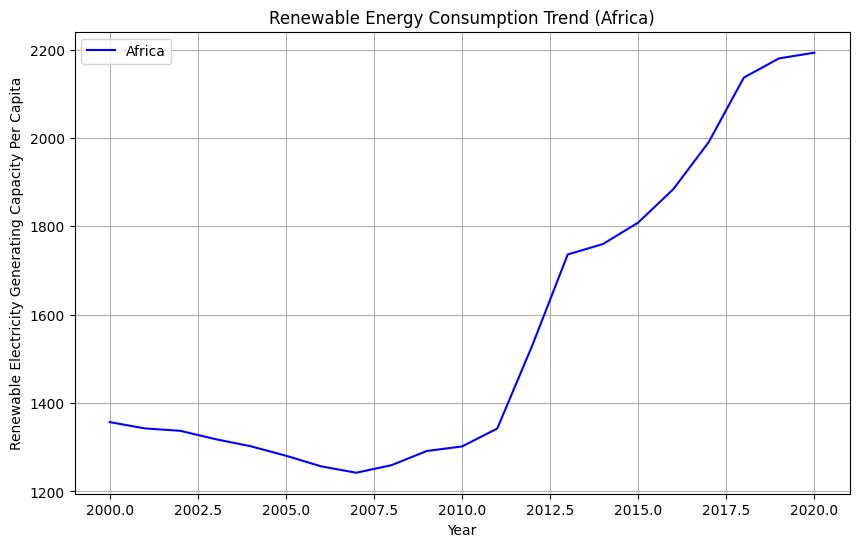

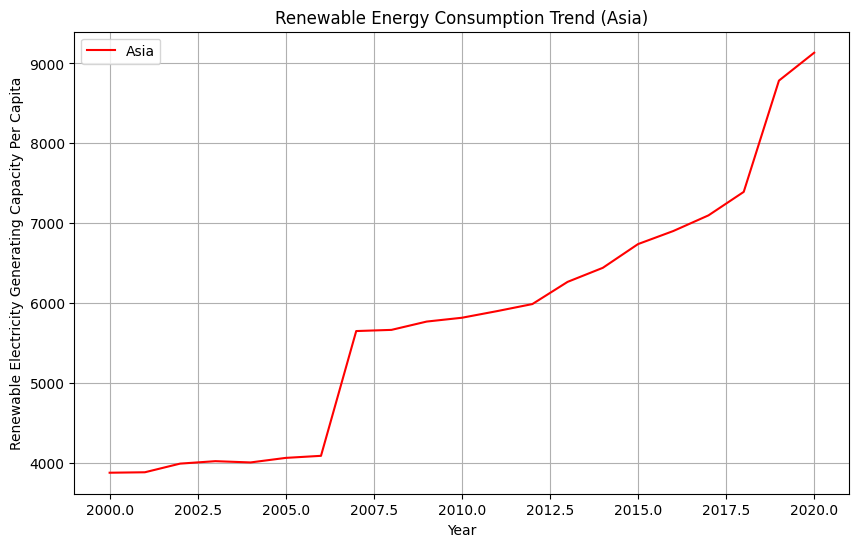

In [ ]:
# Filter data for Africa and Asia
africa_data = combined_df[combined_df['region'] == 'Africa']
asia_data = combined_df[combined_df['region'] == 'Asia']

# Plotting renewable energy consumption over the years for Africa
plt.figure(figsize=(10, 6))
plt.plot(africa_data['Year'], africa_data['Renewable-electricity-generating-capacity-per-capita'], label='Africa', color='blue')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity Generating Capacity Per Capita')
plt.title('Renewable Energy Consumption Trend (Africa)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting renewable energy consumption over the years for Asia
plt.figure(figsize=(10, 6))
plt.plot(asia_data['Year'], asia_data['Renewable-electricity-generating-capacity-per-capita'], label='Asia', color='red')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity Generating Capacity Per Capita')
plt.title('Renewable Energy Consumption Trend (Asia)')
plt.legend()
plt.grid(True)
plt.show()


The above visualization displays the Renewable Energy Consumption Trend in Africa and Asia, We see a lot of improvements in both regions but Africa trails behind Asia. Africa has it's highest at 2200 while Asia is at 9000+ at 2020

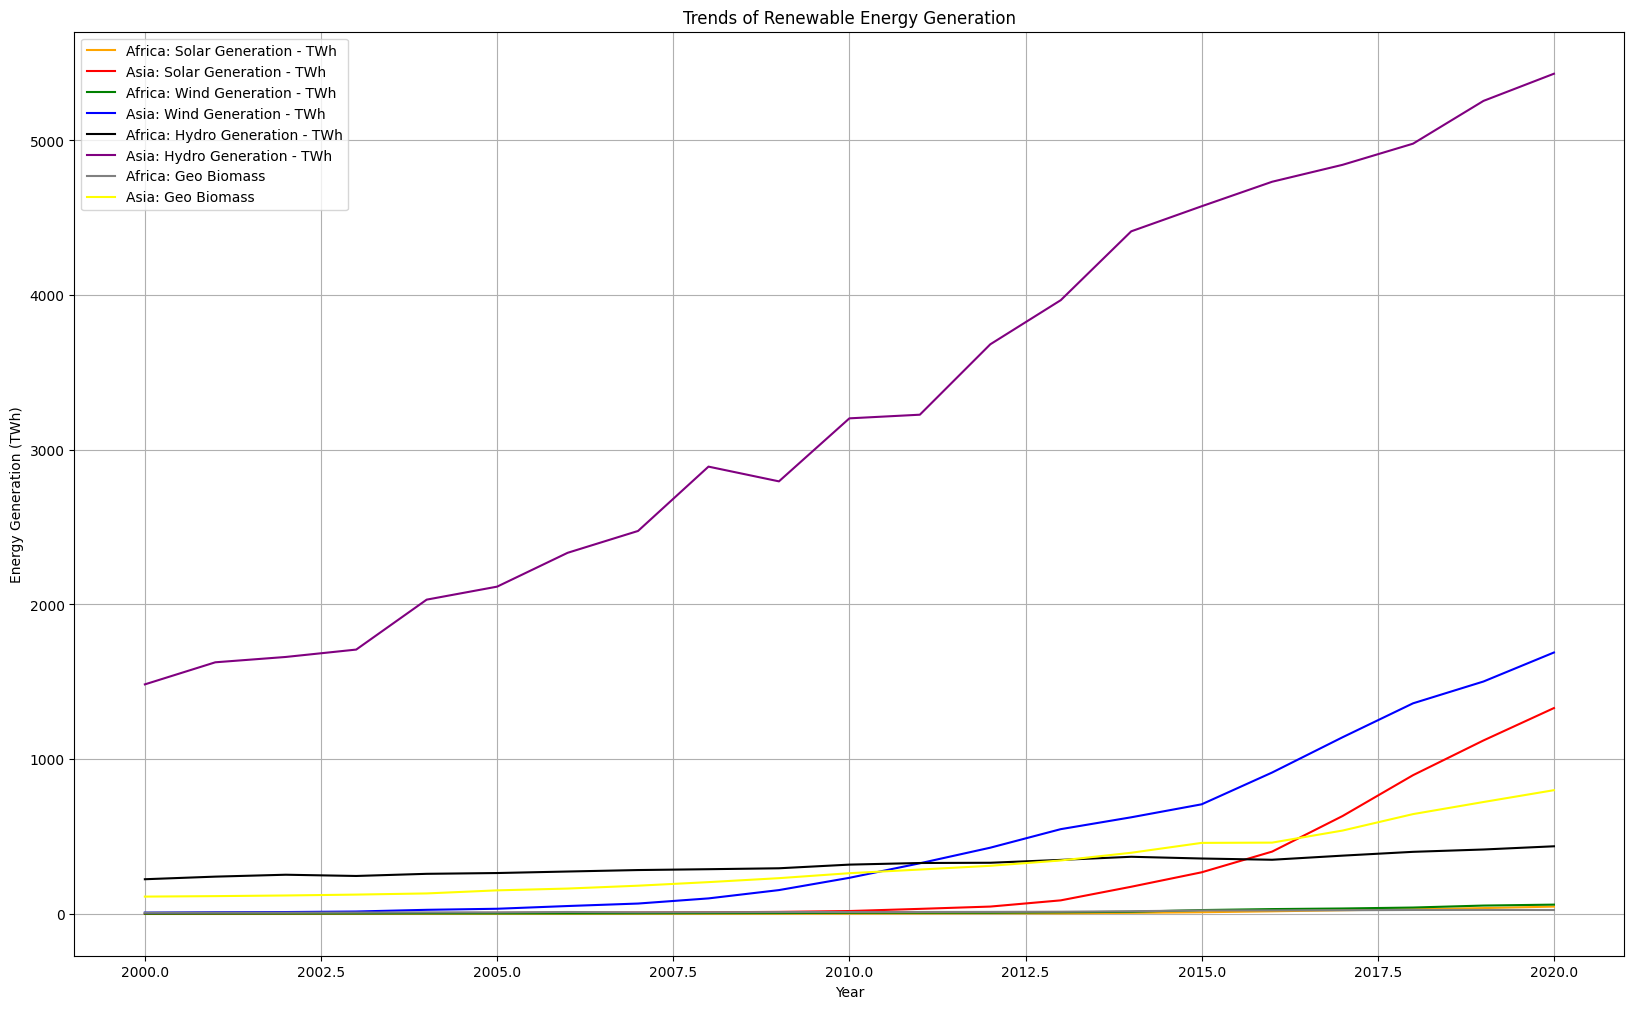

In [ ]:
# Plotting renewable energy consumption for Africa
plt.figure(figsize=(20, 12))

# Solar Generation
plt.plot(combined_df[combined_df['region'] == 'Africa']['Year'], combined_df[combined_df['region'] == 'Africa']['Solar Generation - TWh'], label='Africa: Solar Generation - TWh', color='orange')
plt.plot(combined_df[combined_df['region'] == 'Asia']['Year'], combined_df[combined_df['region'] == 'Asia']['Solar Generation - TWh'], label='Asia: Solar Generation - TWh', color='red')


# Wind Generation
plt.plot(combined_df[combined_df['region'] == 'Africa']['Year'], combined_df[combined_df['region'] == 'Africa']['Wind Generation - TWh'], label='Africa: Wind Generation - TWh', color='green')
plt.plot(combined_df[combined_df['region'] == 'Asia']['Year'], combined_df[combined_df['region'] == 'Asia']['Wind Generation - TWh'], label='Asia: Wind Generation - TWh', color='blue')

# Hydro Generation
plt.plot(combined_df[combined_df['region'] == 'Africa']['Year'], combined_df[combined_df['region'] == 'Africa']['Hydro Generation - TWh'], label='Africa: Hydro Generation - TWh', color='black')
plt.plot(combined_df[combined_df['region'] == 'Asia']['Year'], combined_df[combined_df['region'] == 'Asia']['Hydro Generation - TWh'], label='Asia: Hydro Generation - TWh', color='purple')

# BioMass Generation
plt.plot(combined_df[combined_df['region'] == 'Africa']['Year'], combined_df[combined_df['region'] == 'Africa']['Geo Biomass Other - TWh'], label='Africa: Geo Biomass', color='grey')
plt.plot(combined_df[combined_df['region'] == 'Asia']['Year'], combined_df[combined_df['region'] == 'Asia']['Geo Biomass Other - TWh'], label='Asia: Geo Biomass', color='yellow')

plt.title('Trends of Renewable Energy Generation')
plt.xlabel('Year')
plt.ylabel('Energy Generation (TWh)')
plt.legend()
plt.grid(True)
plt.show()


As we see in the above plot, Africa trail behind in all the renewable energy generation types. Also, we see that Asia invests alot in Hydro Generation.

Let's look at the energy type distribution for 2020 and 2019 in separate visualization

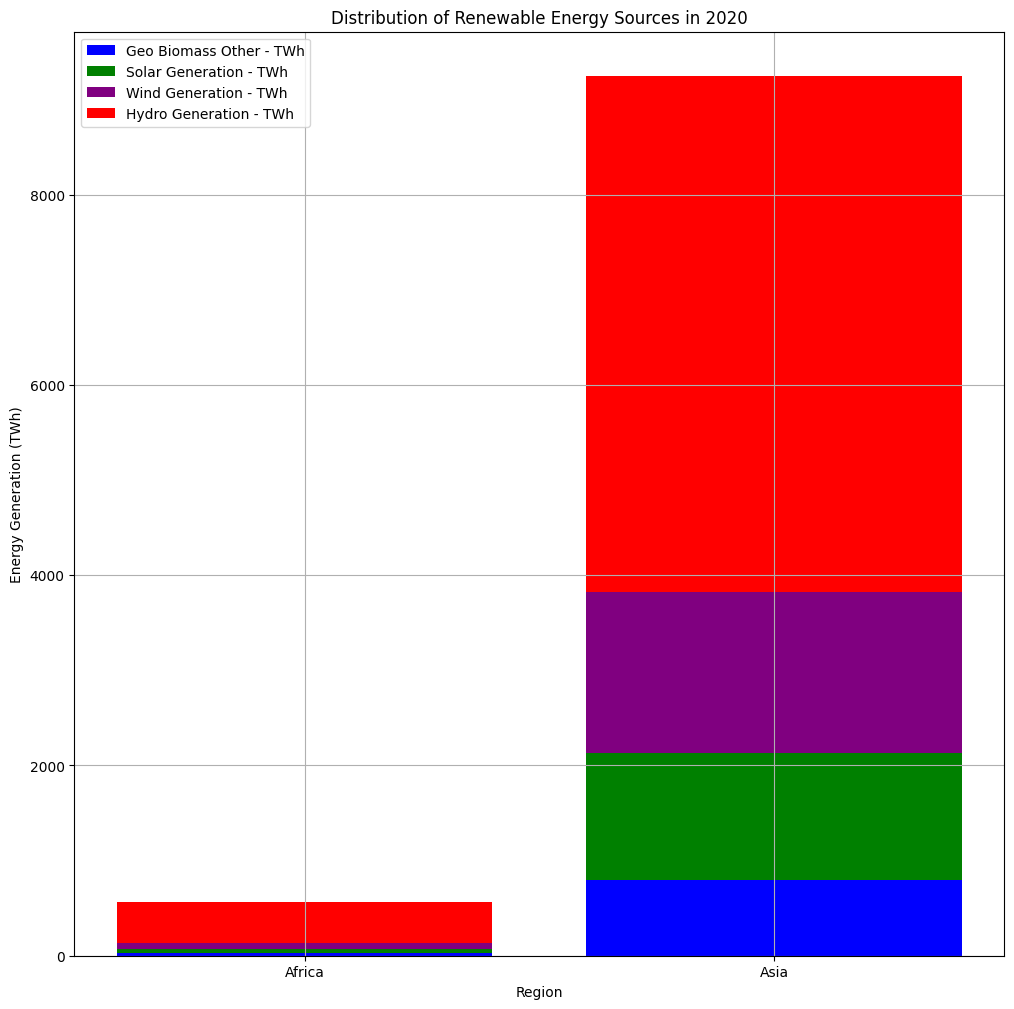

In [ ]:
# Selecting data for the year 2020
data_2020 = combined_df[combined_df['Year'] == 2020]

# Plotting the distribution of renewable energy sources for Africa and Asia in 2020
plt.figure(figsize=(12, 12))

# Geo Biomass Other
plt.bar(['Africa', 'Asia'], data_2020.groupby('region')['Geo Biomass Other - TWh'].sum(), color=['blue'], label='Geo Biomass Other - TWh')

# Solar Generation
plt.bar(['Africa', 'Asia'], data_2020.groupby('region')['Solar Generation - TWh'].sum(), color=['green'], bottom=data_2020.groupby('region')['Geo Biomass Other - TWh'].sum(), label='Solar Generation - TWh')

# Wind Generation
plt.bar(['Africa', 'Asia'], data_2020.groupby('region')['Wind Generation - TWh'].sum(), color=['purple'], bottom=data_2020.groupby('region')['Geo Biomass Other - TWh'].sum() + data_2020.groupby('region')['Solar Generation - TWh'].sum(), label='Wind Generation - TWh')

# Hydro Generation
plt.bar(['Africa', 'Asia'], data_2020.groupby('region')['Hydro Generation - TWh'].sum(), color=['red'], bottom=data_2020.groupby('region')['Geo Biomass Other - TWh'].sum() + data_2020.groupby('region')['Solar Generation - TWh'].sum() + data_2020.groupby('region')['Wind Generation - TWh'].sum(), label='Hydro Generation - TWh')

plt.title('Distribution of Renewable Energy Sources in 2020')
plt.xlabel('Region')
plt.ylabel('Energy Generation (TWh)')
plt.legend()
plt.grid(True)
plt.show()


Asia takes the lead. Africa trails in all aspect

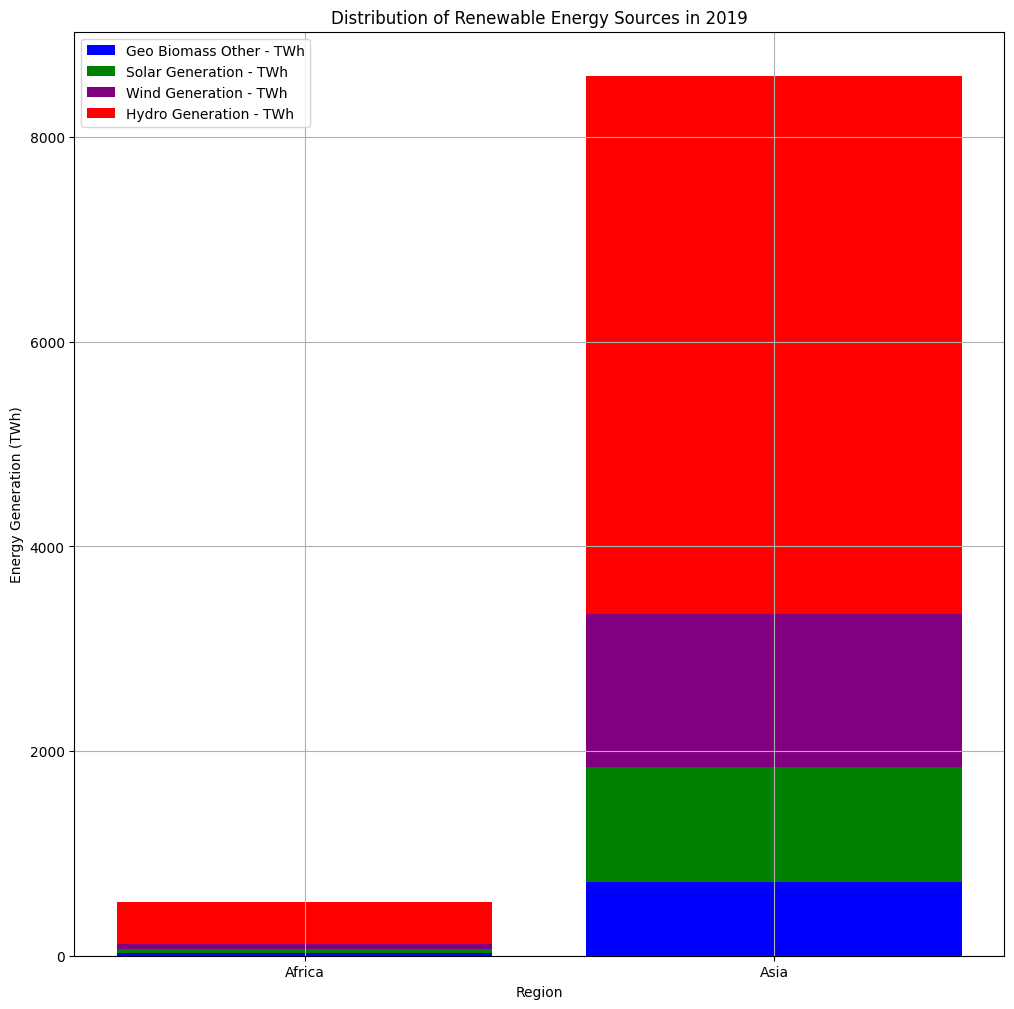

In [ ]:
# Selecting data for the year 2020
data_2019 = combined_df[combined_df['Year'] == 2019]

# Plotting the distribution of renewable energy sources for Africa and Asia in 2020
plt.figure(figsize=(12, 12))

# Geo Biomass Other
plt.bar(['Africa', 'Asia'], data_2019.groupby('region')['Geo Biomass Other - TWh'].sum(), color=['blue'], label='Geo Biomass Other - TWh')

# Solar Generation
plt.bar(['Africa', 'Asia'], data_2019.groupby('region')['Solar Generation - TWh'].sum(), color=['green'], bottom=data_2019.groupby('region')['Geo Biomass Other - TWh'].sum(), label='Solar Generation - TWh')

# Wind Generation
plt.bar(['Africa', 'Asia'], data_2019.groupby('region')['Wind Generation - TWh'].sum(), color=['purple'], bottom=data_2019.groupby('region')['Geo Biomass Other - TWh'].sum() + data_2019.groupby('region')['Solar Generation - TWh'].sum(), label='Wind Generation - TWh')

# Hydro Generation
plt.bar(['Africa', 'Asia'], data_2019.groupby('region')['Hydro Generation - TWh'].sum(), color=['red'], bottom=data_2019.groupby('region')['Geo Biomass Other - TWh'].sum() + data_2019.groupby('region')['Solar Generation - TWh'].sum() + data_2019.groupby('region')['Wind Generation - TWh'].sum(), label='Hydro Generation - TWh')

plt.title('Distribution of Renewable Energy Sources in 2019')
plt.xlabel('Region')
plt.ylabel('Energy Generation (TWh)')
plt.legend()
plt.grid(True)
plt.show()


Same with 2019

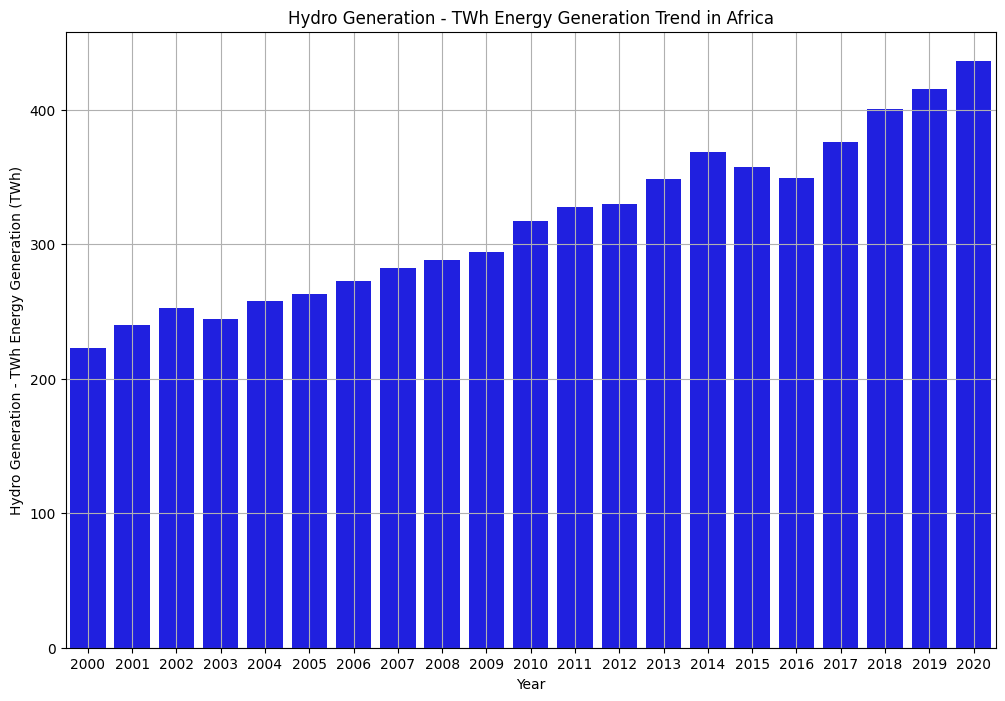

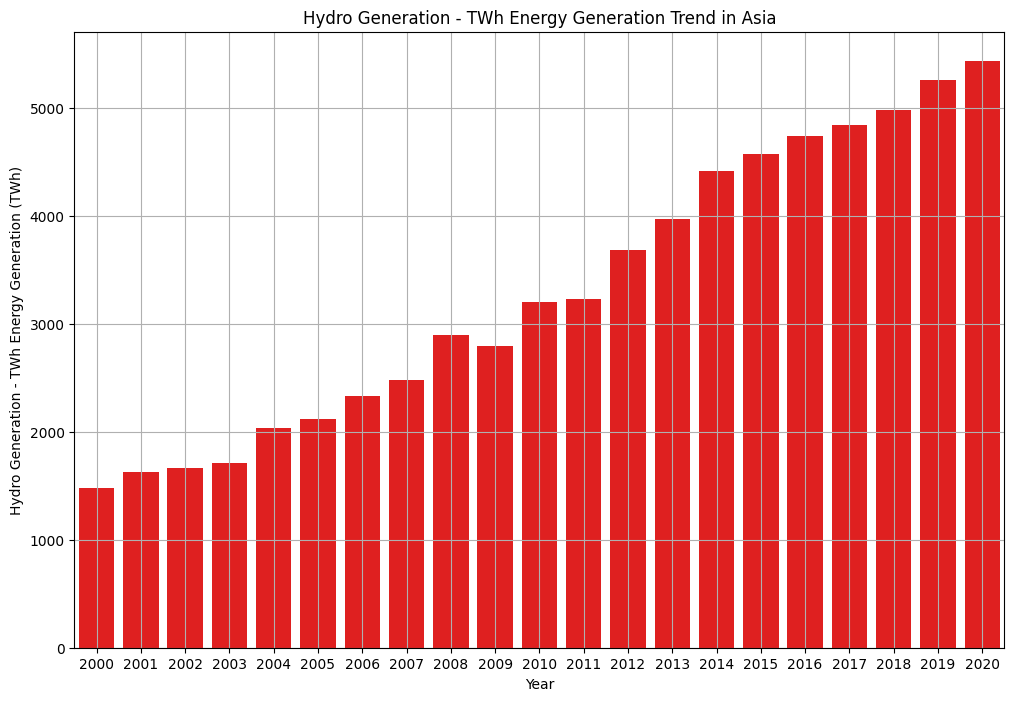

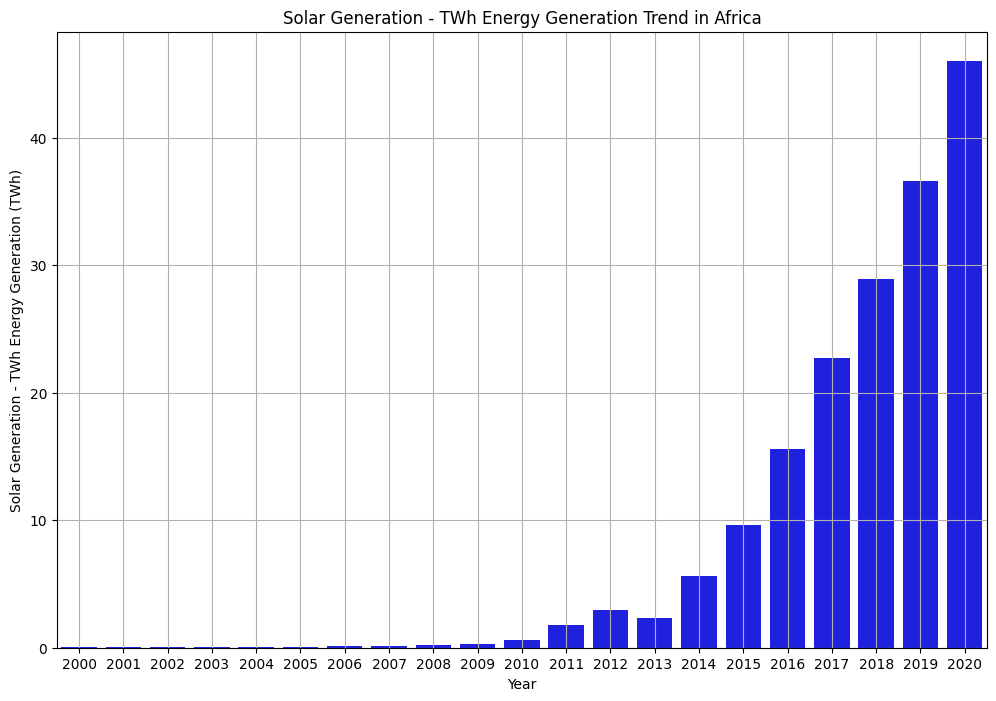

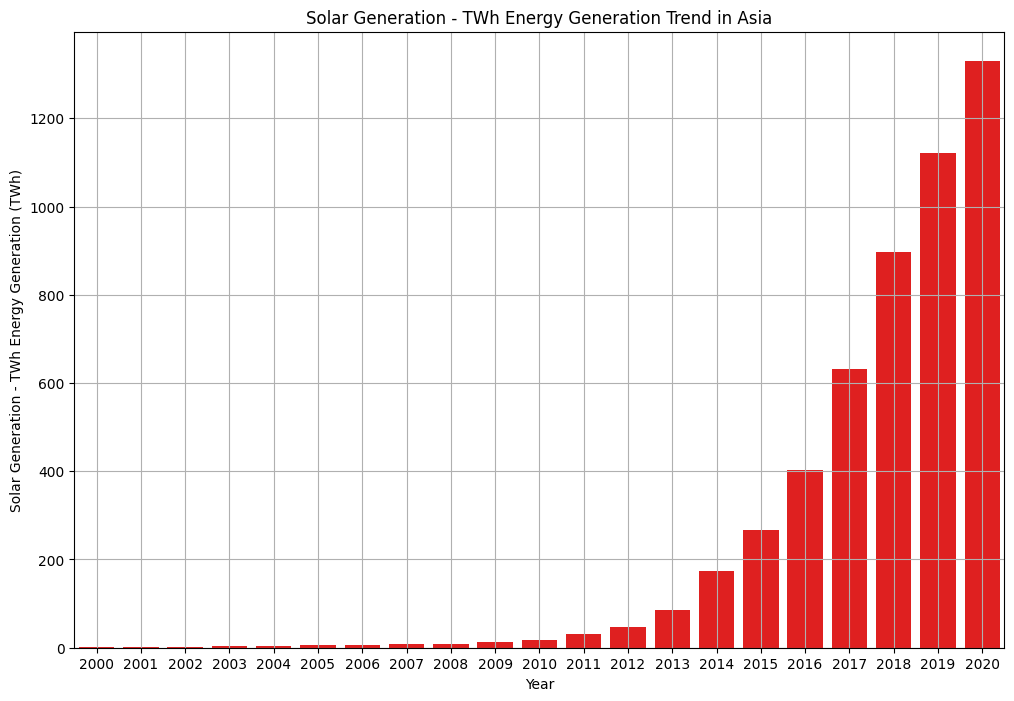

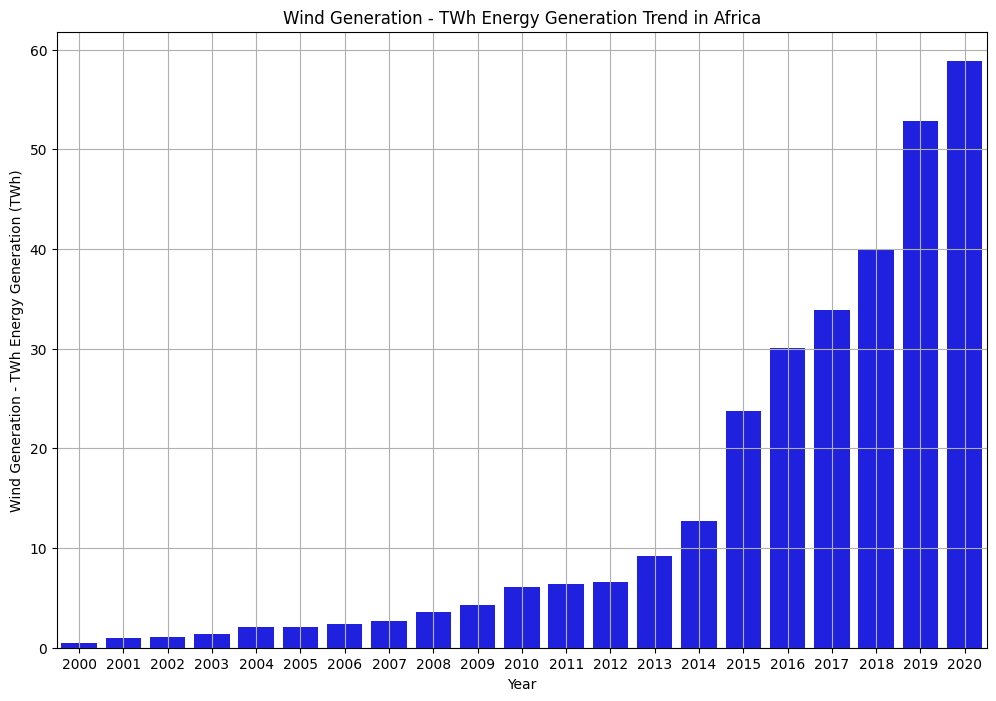

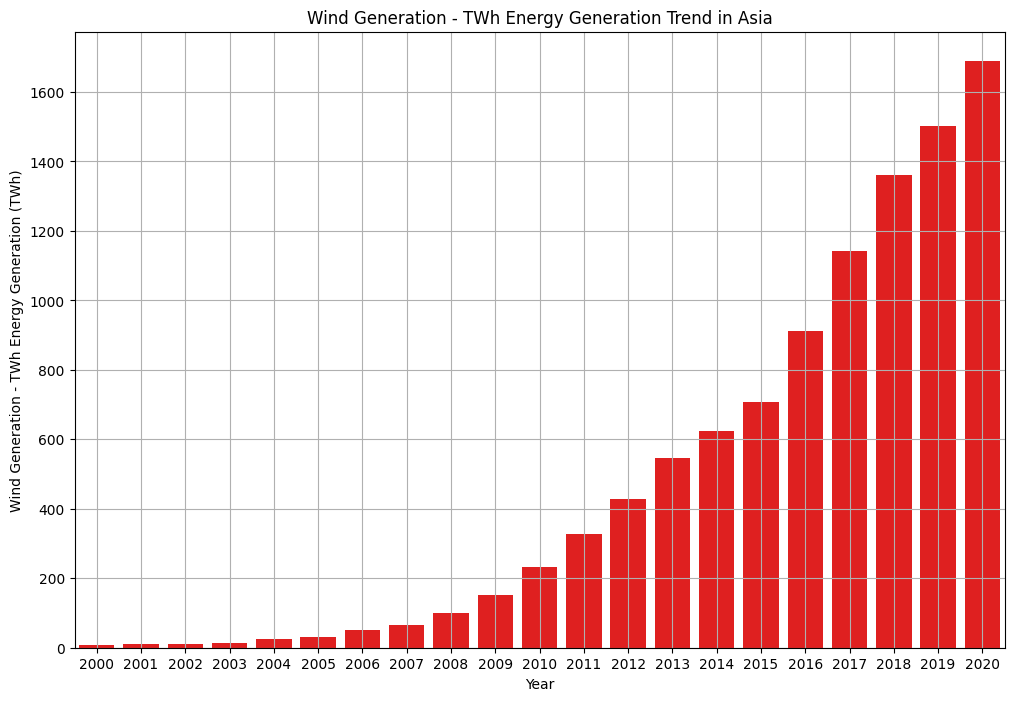

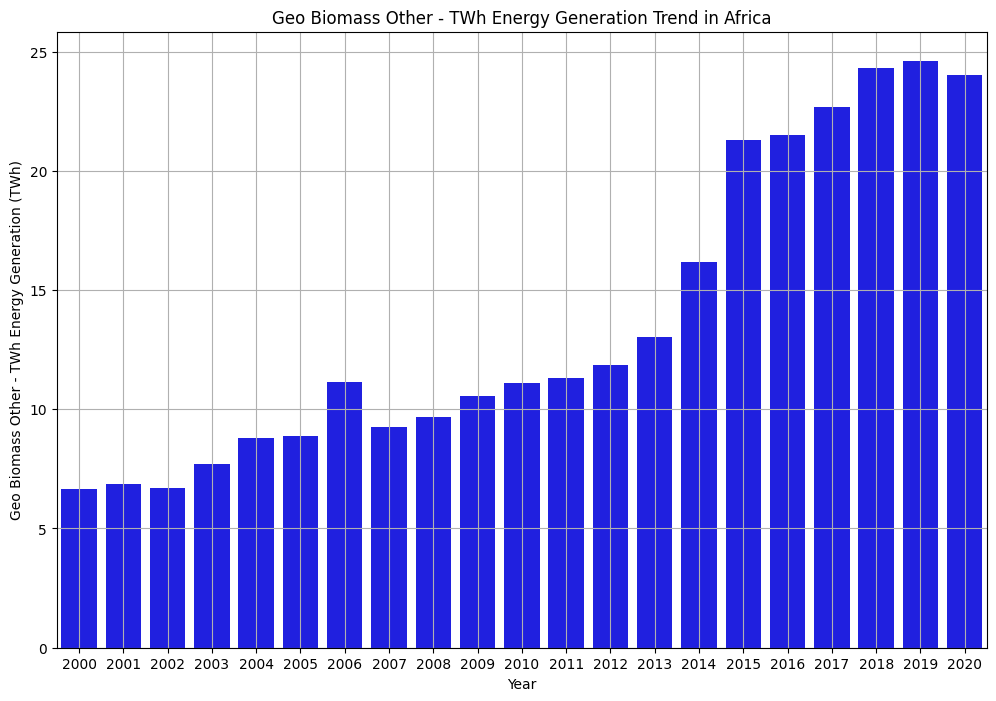

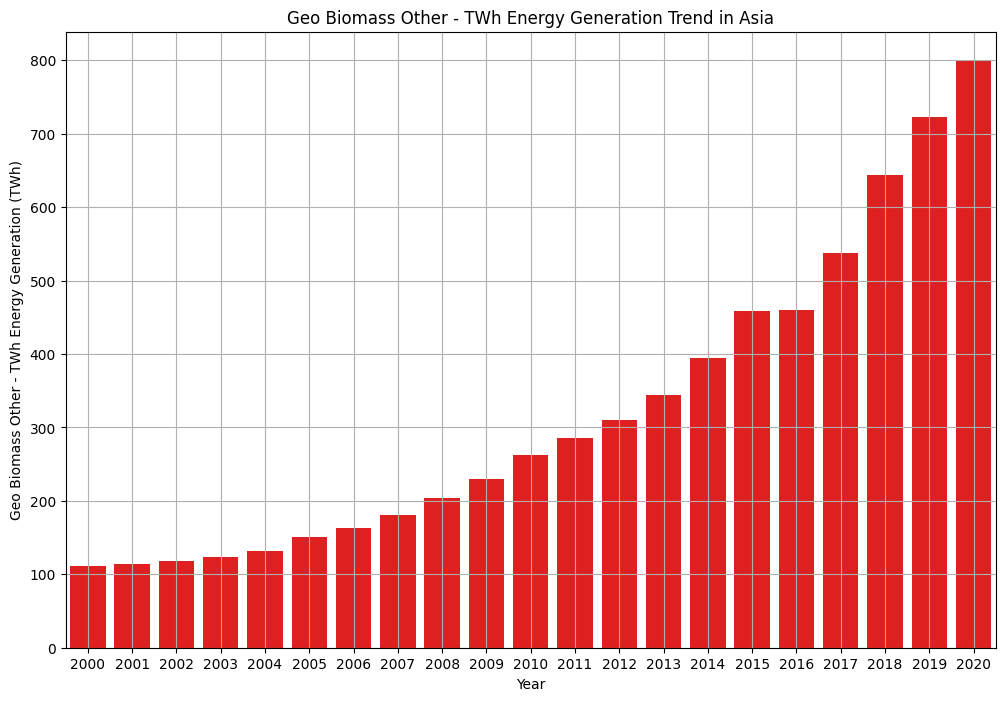

In [ ]:
# Define the energy sources
energy_sources = ['Hydro Generation - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Geo Biomass Other - TWh']

# Filter data for Africa and Asia
africa_df = combined_df[combined_df['region'] == 'Africa']
asia_df = combined_df[combined_df['region'] == 'Asia']

# Plot for each energy source and region
for source in energy_sources:
    # Sum energy generation for each year
    africa_generation = africa_df.groupby('Year')[source].sum().reset_index()
    asia_generation = asia_df.groupby('Year')[source].sum().reset_index()

    # Plot for Africa
    plt.figure(figsize=(12, 8))
    sns.barplot(data=africa_generation, x='Year', y=source, color='blue')
    plt.title(f'{source} Energy Generation Trend in Africa')
    plt.xlabel('Year')
    plt.ylabel(f'{source} Energy Generation (TWh)')
    plt.grid(True)
    plt.show()

    # Plot for Asia
    plt.figure(figsize=(12, 8))
    sns.barplot(data=asia_generation, x='Year', y=source, color='red')
    plt.title(f'{source} Energy Generation Trend in Asia')
    plt.xlabel('Year')
    plt.ylabel(f'{source} Energy Generation (TWh)')
    plt.grid(True)
    plt.show()

Some new insights uncovered:

- Solar energy seem to becoming popular in 2013/2014 in Asia as we see the increase from the barplot
- In Africa, Solar energy starts gaining some ground in 2014
- All the regions saw significant increase in all renewable energy source over the years

# **Feature Engineering**

In [ ]:
# Let's create another column called Total Renewable Energy (TWh) to see the joint effect of each sources for the regions
combined_df['Total Renewable Energy (TWh)'] = combined_df['Hydro Generation - TWh'] + combined_df['Geo Biomass Other - TWh'] + combined_df['Solar Generation - TWh'] + combined_df['Wind Generation - TWh']

In [ ]:
combined_df

,Year,region,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,Total Renewable Energy (TWh)
0,2000,Africa,6.68,0.04,0.44,223.03,1641.36,1037.90,1356.94,66380000.00,...,237547.15,353.95,660040.00,9.84,127.38,52450.46,27786546.00,128.86,874.81,230.18
1,2000,Asia,110.77,1.18,7.23,1482.97,3180.62,2308.20,3873.46,1061990000.00,...,1271538.40,293.19,7264990.00,102.31,222.85,243998.83,29223479.00,1061.34,2769.68,1602.15
2,2001,Africa,6.86,0.04,1.02,239.88,1674.98,1061.40,1342.61,100670000.00,...,241470.98,349.52,707420.00,10.30,228.85,51776.78,27786546.00,128.86,874.81,247.80
3,2001,Asia,113.77,1.70,9.77,1625.76,3199.86,2345.05,3879.08,929210000.00,...,1270579.48,280.48,7522140.00,99.13,139.34,229400.63,29223479.00,1061.34,2769.68,1751.01
4,2002,Africa,6.70,0.05,1.11,252.17,1712.72,1084.00,1337.30,281900000.00,...,267984.31,342.73,717370.01,9.83,193.87,51404.67,27786546.00,128.86,874.81,260.03
5,2002,Asia,118.01,2.36,10.87,1660.27,3262.12,2382.40,3987.42,816650000.00,...,1293328.39,272.26,7943720.08,100.33,164.34,233493.67,29223479.00,1061.34,2769.68,1791.51
6,2003,Africa,7.72,0.06,1.37,244.15,1777.70,1106.85,1318.34,2102030000.00,...,269714.16,345.96,757980.00,10.12,153.31,62077.08,27786546.00,128.86,874.81,253.30
7,2003,Asia,123.70,3.20,14.37,1708.00,3273.63,2421.65,4018.16,899360000.00,...,1346063.82,273.25,8668360.13,103.59,214.17,259150.47,29223479.00,1061.34,2769.68,1849.27
8,2004,Africa,8.78,0.07,2.06,258.04,1825.52,1127.80,1302.34,394470000.00,...,258404.62,341.88,792799.99,9.61,260.76,75384.12,27786546.00,128.86,874.81,268.95
9,2004,Asia,131.23,4.22,25.28,2030.89,3305.25,2461.25,4002.28,1066360000.00,...,1412993.10,269.64,9557679.85,105.47,327.27,296211.30,29223479.00,1061.34,2769.68,2191.62


We now have a new column named "Total Renewable Energy (TWh)"

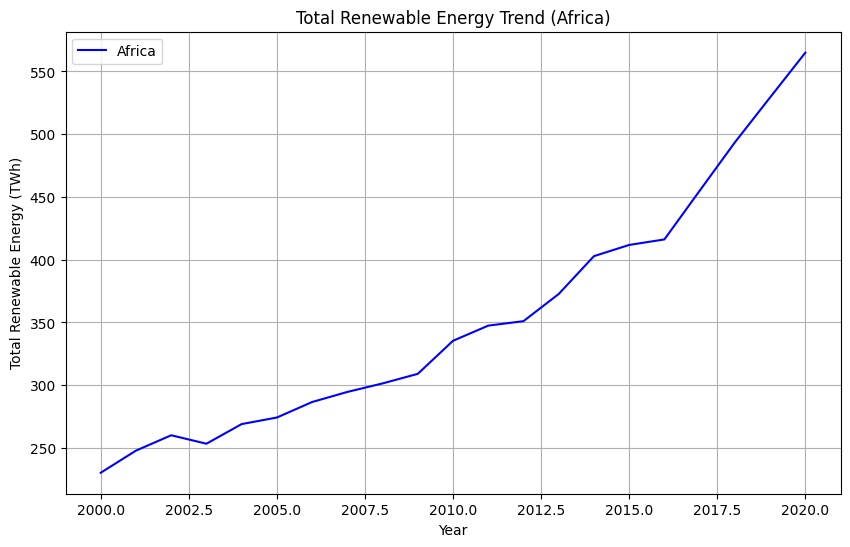

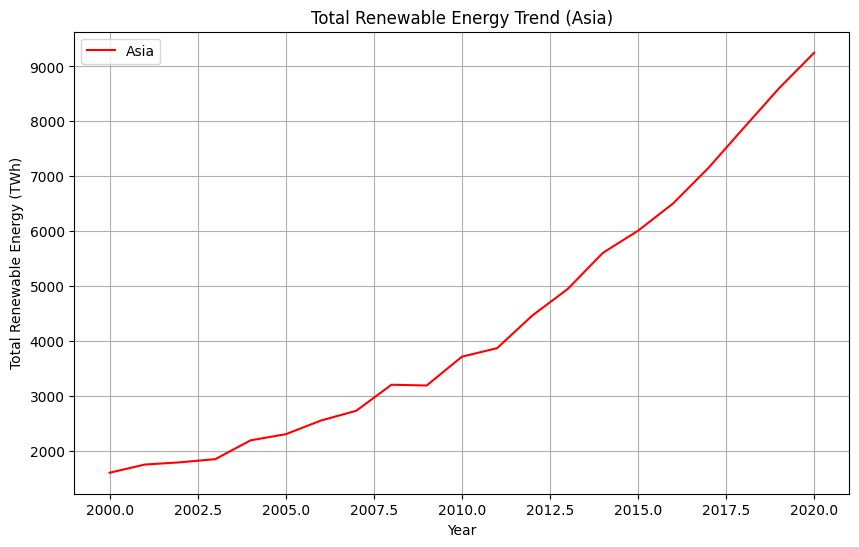

In [ ]:
# Filter data for Africa and Asia
africa_data = combined_df[combined_df['region'] == 'Africa']
asia_data = combined_df[combined_df['region'] == 'Asia']

# Plotting renewable energy consumption over the years for Africa
plt.figure(figsize=(10, 6))
plt.plot(africa_data['Year'], africa_data['Total Renewable Energy (TWh)'], label='Africa', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy (TWh)')
plt.title('Total Renewable Energy Trend (Africa)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting renewable energy consumption over the years for Asia
plt.figure(figsize=(10, 6))
plt.plot(asia_data['Year'], asia_data['Total Renewable Energy (TWh)'], label='Asia', color='red')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy (TWh)')
plt.title('Total Renewable Energy Trend (Asia)')
plt.legend()
plt.grid(True)
plt.show()


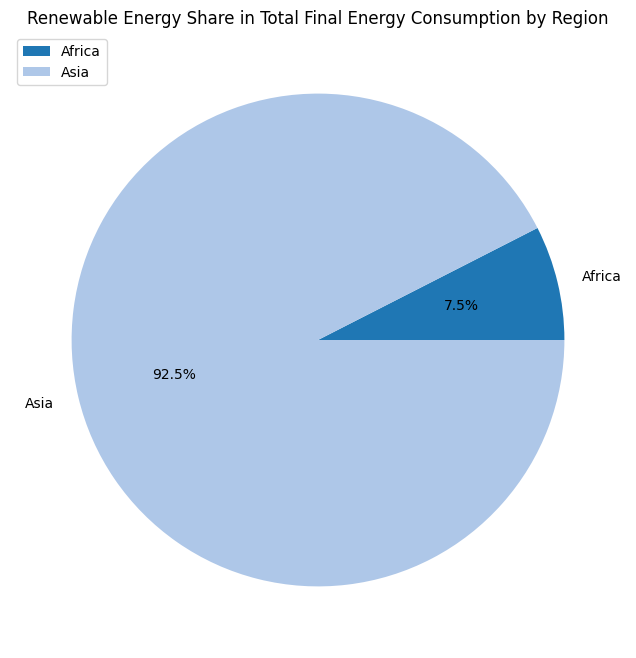

In [ ]:
# Group by region and calculate mean of Total Renewable Energy (TWh)
renewable_energy_by_region = combined_df.groupby('region')['Total Renewable Energy (TWh)'].mean()

# Plot pie chart
plt.figure(figsize=(8, 8))
renewable_energy_by_region.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Renewable Energy Share in Total Final Energy Consumption by Region')
plt.ylabel('')
plt.legend(renewable_energy_by_region.index, loc='upper left')
plt.show()

Asia takes 92.5% of the renweable energy share while Africa takes 7.5%

We see a significant increase for each regions

In [ ]:
#Let's drop some features
combined_df.drop(['Latitude', 'Longitude', 'gdp_per_capita', 'gdp_growth', 'Low-carbon electricity (% electricity)', 'Electricity from nuclear (TWh)', 'Access to clean fuels for cooking'], axis=1, inplace=True)

In [ ]:
#drop more
combined_df.drop(['Value_co2_emissions_kt_by_country', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], axis=1, inplace=True)

In [ ]:
combined_df

,Year,region,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh,Access to electricity (% of population),Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),Renewables (% equivalent primary energy),Land Area(Km2),Total Renewable Energy (TWh)
0,2000,Africa,6.68,0.04,0.44,223.03,1641.36,1356.94,66380000.00,3136.20,325.70,66.71,237547.15,9.84,27786546.00,230.18
1,2000,Asia,110.77,1.18,7.23,1482.97,3180.62,3873.46,1061990000.00,946.76,3049.53,572.22,1271538.40,102.31,29223479.00,1602.15
2,2001,Africa,6.86,0.04,1.02,239.88,1674.98,1342.61,100670000.00,3117.67,337.63,73.26,241470.98,10.30,27786546.00,247.80
3,2001,Asia,113.77,1.70,9.77,1625.76,3199.86,3879.08,929210000.00,946.26,3175.86,614.75,1270579.48,99.13,29223479.00,1751.01
4,2002,Africa,6.70,0.05,1.11,252.17,1712.72,1337.30,281900000.00,3102.91,358.81,75.26,267984.31,9.83,27786546.00,260.03
5,2002,Asia,118.01,2.36,10.87,1660.27,3262.12,3987.42,816650000.00,936.69,3440.11,637.66,1293328.39,100.33,29223479.00,1791.51
6,2003,Africa,7.72,0.06,1.37,244.15,1777.70,1318.34,2102030000.00,3073.02,382.60,73.91,269714.16,10.12,27786546.00,253.30
7,2003,Asia,123.70,3.20,14.37,1708.00,3273.63,4018.16,899360000.00,925.22,3791.98,661.23,1346063.82,103.59,29223479.00,1849.27
8,2004,Africa,8.78,0.07,2.06,258.04,1825.52,1302.34,394470000.00,3041.25,404.71,78.57,258404.62,9.61,27786546.00,268.95
9,2004,Asia,131.23,4.22,25.28,2030.89,3305.25,4002.28,1066360000.00,917.47,4080.94,779.14,1412993.10,105.47,29223479.00,2191.62


In [ ]:
combined_df.shape

(42, 16)

Now we have only 16 features

In [ ]:
combined_df.columns

Index(['Year', 'region', 'Geo Biomass Other - TWh', 'Solar Generation - TWh',
       'Wind Generation - TWh', 'Hydro Generation - TWh',
       'Access to electricity (% of population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewables (% equivalent primary energy)', 'Land Area(Km2)',
       'Total Renewable Energy (TWh)'],
      dtype='object')

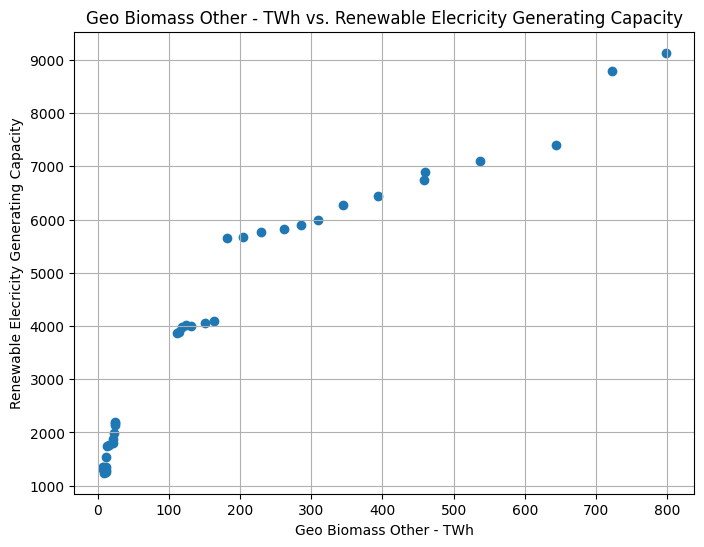

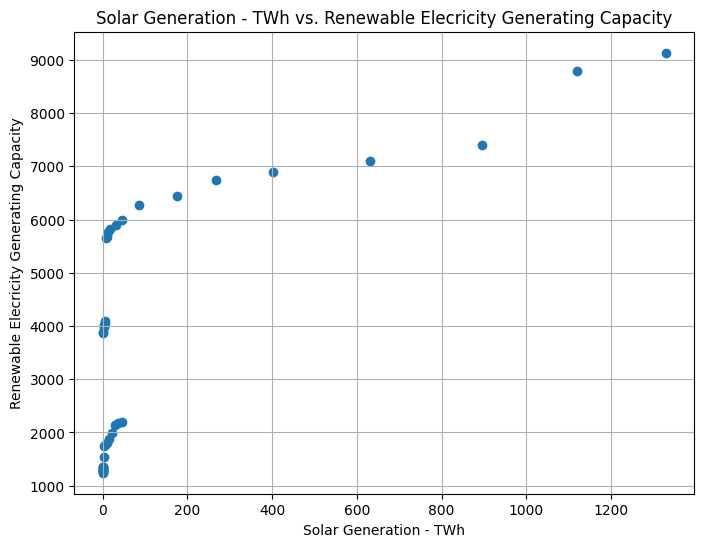

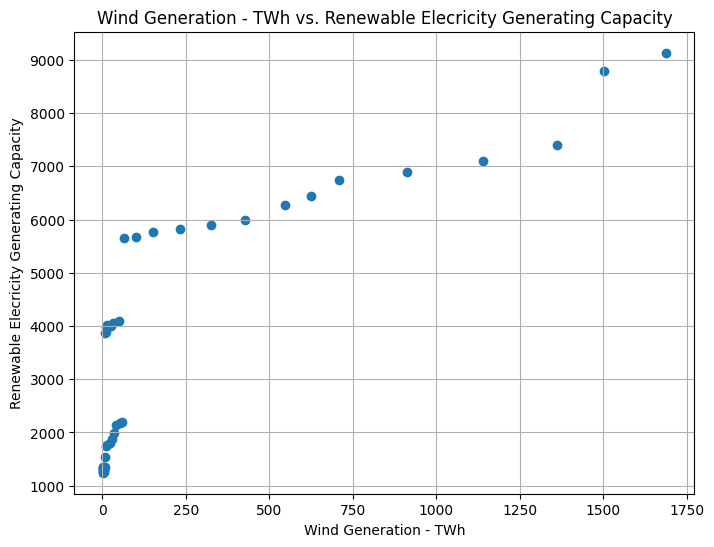

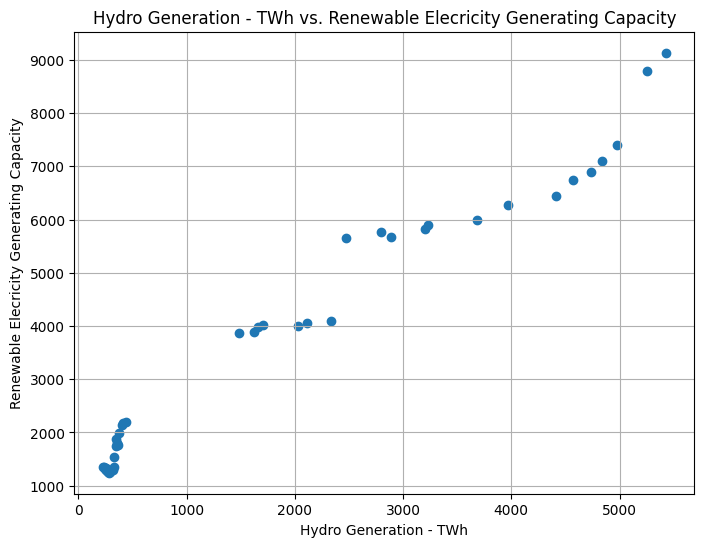

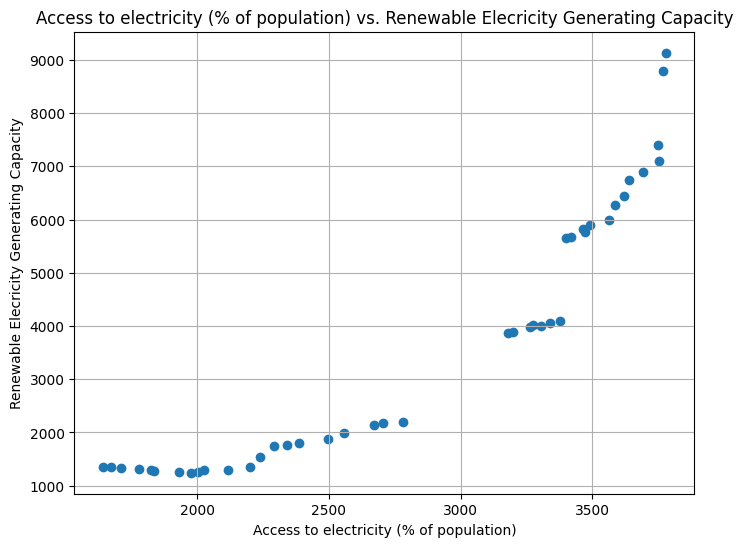

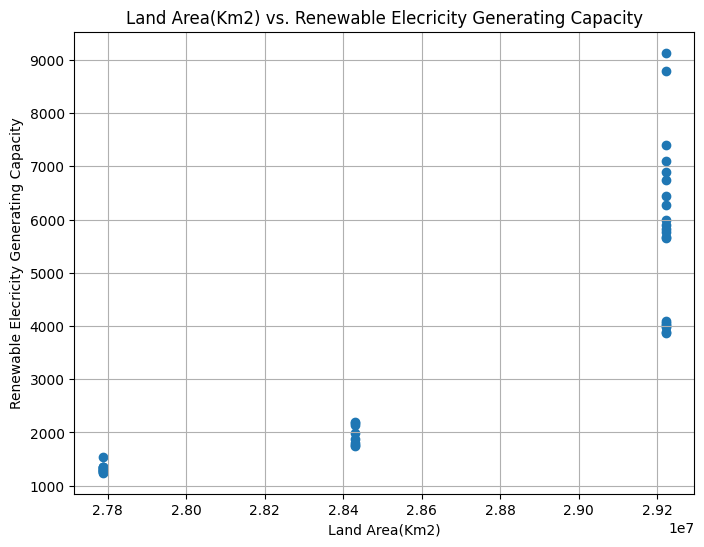

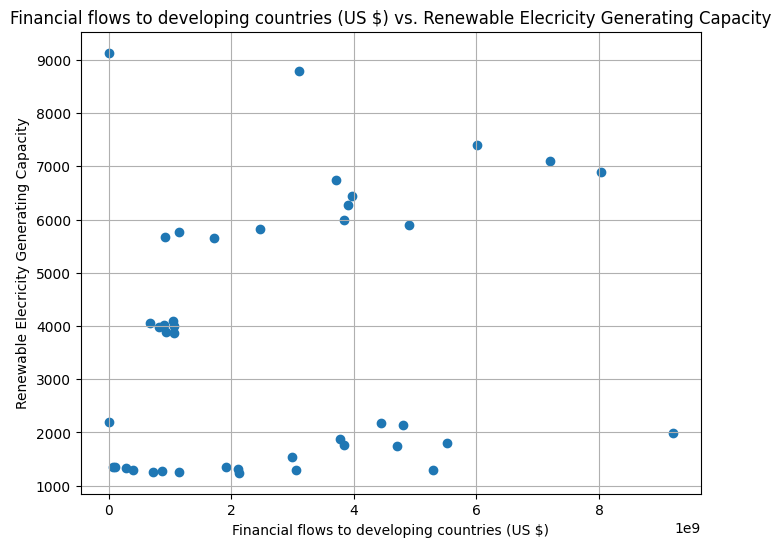

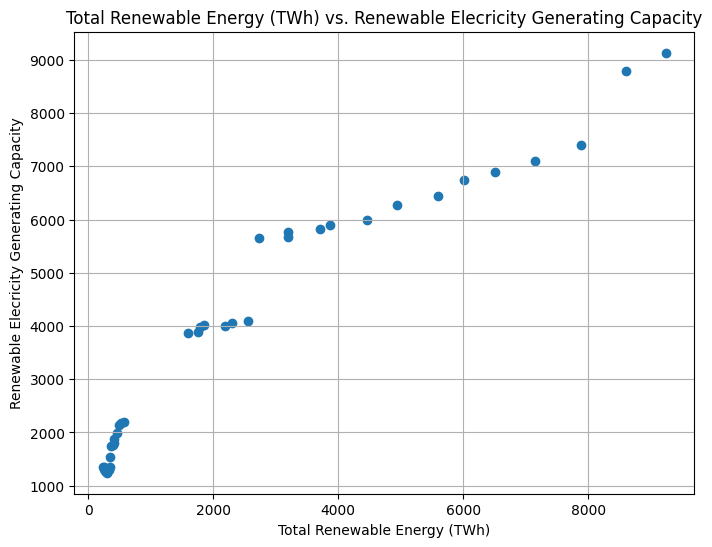

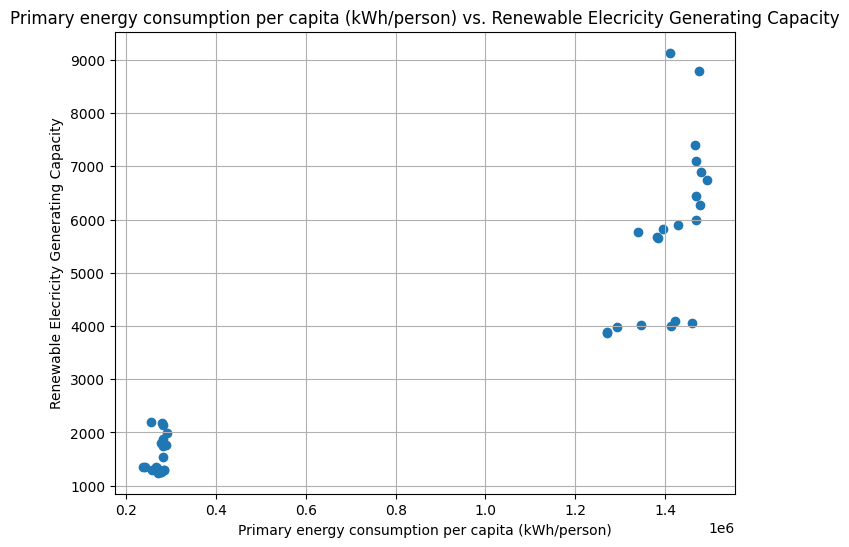

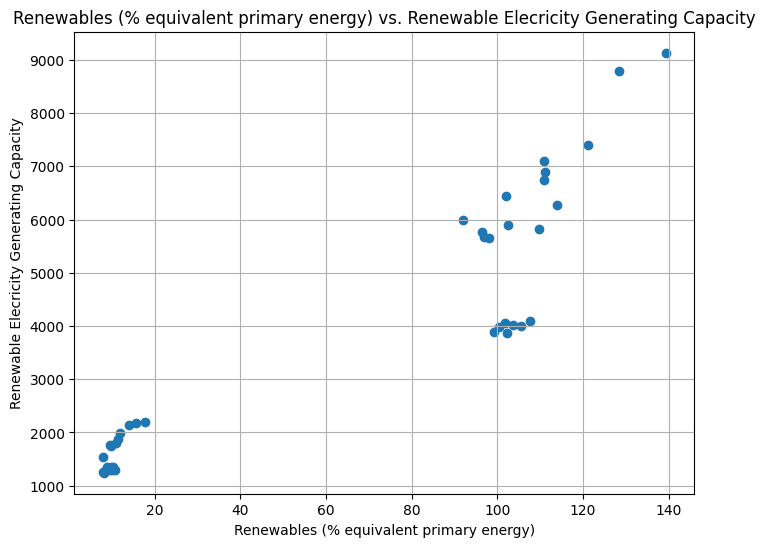

In [ ]:
# Features to plot against 'Total Renewable Energy (TWh)'
features = ['Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh',
            'Hydro Generation - TWh', 'Access to electricity (% of population)',
            'Land Area(Km2)',
            'Financial flows to developing countries (US $)',
            'Total Renewable Energy (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Renewables (% equivalent primary energy)']

# Plotting each feature against 'Total Renewable Energy (TWh)'
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(combined_df[feature], combined_df['Renewable-electricity-generating-capacity-per-capita'])
    plt.xlabel(feature)
    plt.ylabel('Renewable Elecricity Generating Capacity')
    plt.title(f'{feature} vs. Renewable Elecricity Generating Capacity')
    plt.grid(True)
    plt.show()

There exist some linear relationships between most of the features. The most significant insight here is that, there seem to be no relationship between the 'Financial flows to developing countries (US $)' and 'Renewable Elecricity Generating Capacity' because the dots are more scattered for that plot

### The Heatmap

In [ ]:
features.extend(['Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
        'Land Area(Km2)',
       'Total Renewable Energy (TWh)'])
corr_matrix = combined_df[features].corr()

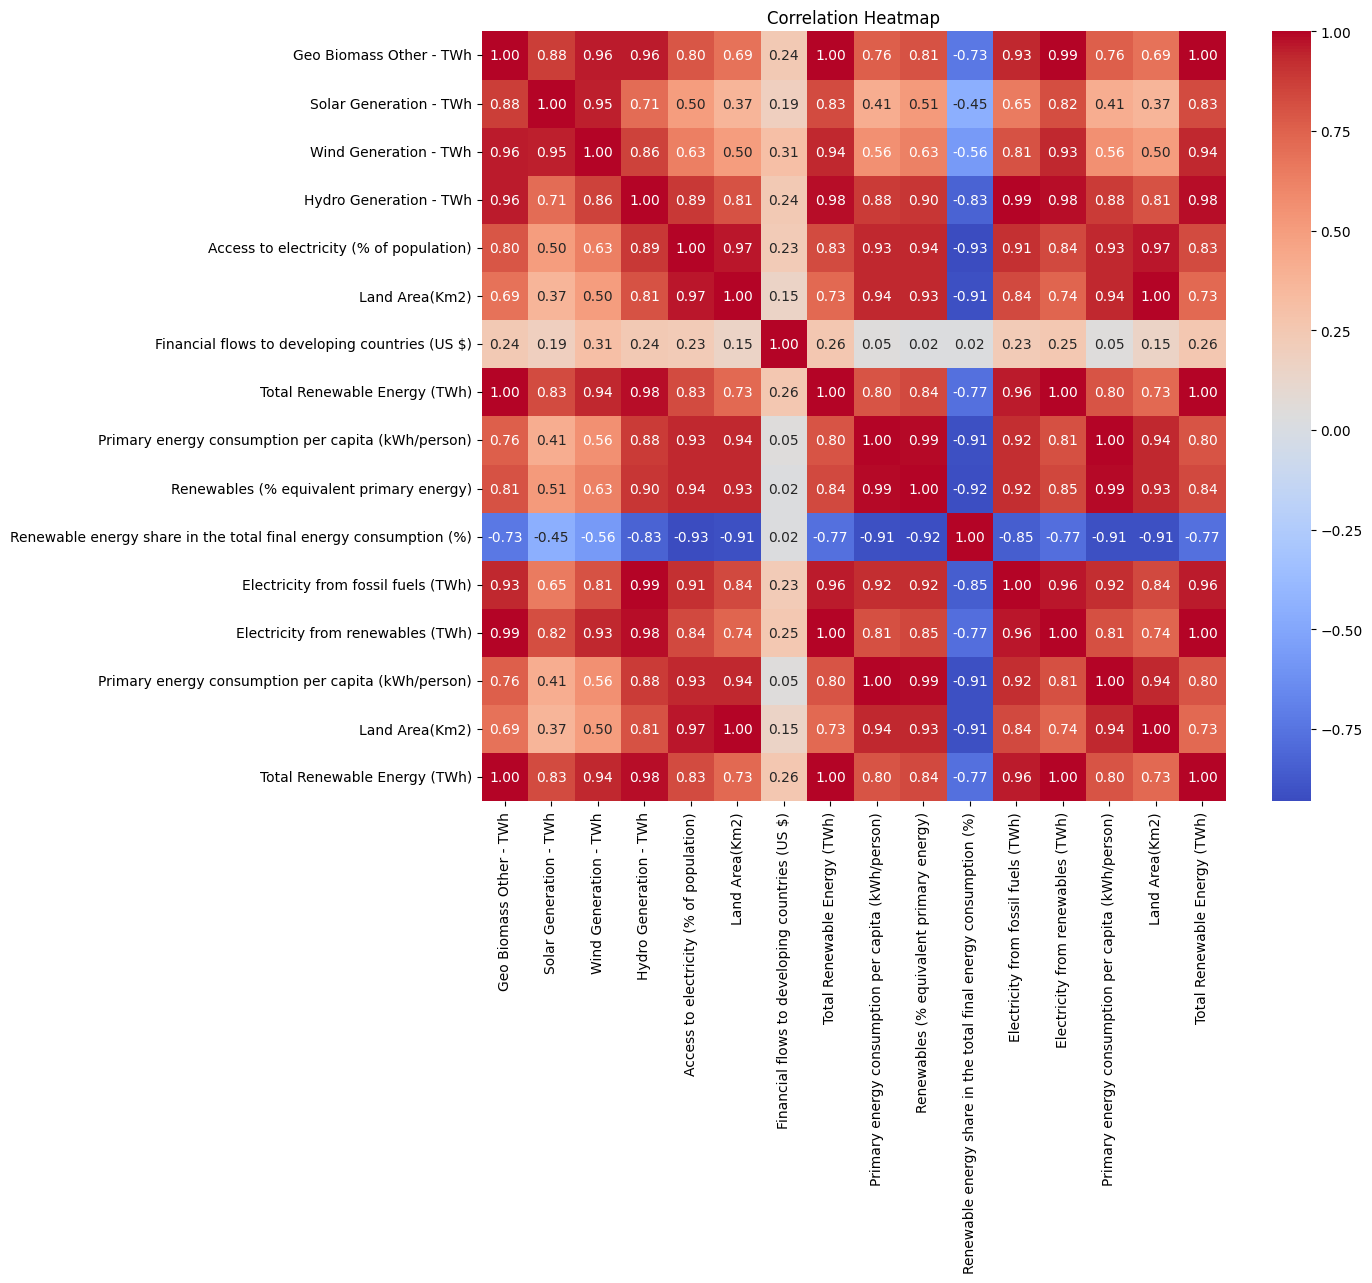

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Again, we see that there is little/no correlation between the 'Financial flows to developing countries (US $)' and other features in the dataset. Also, there are negative correlation between the 'Renewable energy share in the total final energy consumption (%)' and other features. Most of the data shows some high level of correlation

## **Building the ML Models**

## Ordinary Least Squares regression (OLS)

In [ ]:
# Define the dependent and independent variables
y = combined_df['Renewable-electricity-generating-capacity-per-capita']
X = ['Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
        'Land Area(Km2)','Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh',
            'Hydro Generation - TWh', 'Access to electricity (% of population)',
            'Land Area(Km2)',
            'Total Renewable Energy (TWh)',
            'Primary energy consumption per capita (kWh/person)',
            'Financial flows to developing countries (US $)',
            'Primary energy consumption per capita (kWh/person)',
            'Renewables (% equivalent primary energy)']

In [ ]:
# Add a constant term to the independent variables
X_with_constant = sm.add_constant(combined_df[X])

In [ ]:
# Create the OLS model
model2 = sm.OLS(y, X_with_constant)

In [ ]:
# Fit the model
results = model2.fit()

In [ ]:
# Print the summary of the regression results
print(results.summary())

                                             OLS Regression Results                                             
Dep. Variable:     Renewable-electricity-generating-capacity-per-capita   R-squared:                       0.993
Model:                                                              OLS   Adj. R-squared:                  0.991
Method:                                                   Least Squares   F-statistic:                     360.2
Date:                                                  Fri, 22 Mar 2024   Prob (F-statistic):           3.64e-28
Time:                                                          08:05:59   Log-Likelihood:                -281.03
No. Observations:                                                    42   AIC:                             588.1
Df Residuals:                                                        29   BIC:                             610.7
Df Model:                                                            12                         

From the summary above:
- R-squared: The coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, it's 0.993, indicating that 99.3% of the variance in the dependent variable is explained by the independent variables.
- Adj. R-squared: The R-squared adjusted for the number of predictors in the model. It's 0.991 in this case.
- F-statistic: A measure of the overall significance of the regression model. It's 360.2, indicating that the regression model is statistically significant.
- Prob (F-statistic): The probability associated with the F-statistic. It's very close to zero (3.64e-28), indicating that the regression model is statistically significant.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_true = combined_df['Renewable-electricity-generating-capacity-per-capita']
y_pred = results.predict(X_with_constant)

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_true, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("Mean absolute percentage error:", mape)


Mean absolute error: 141.45806509287573
Root mean squared error: 194.87337537830717
Mean absolute percentage error: 0.04481084602398279


- Mean Absolute Error (MAE): This measures the average absolute difference between the predicted values and the actual values. In this case, the MAE is approximately 141.46.

- Root Mean Squared Error (RMSE): This is similar to MAE but gives more weight to large errors. It's the square root of the average of the squared differences between predicted and actual values. The RMSE is approximately 194.87.

- Mean Absolute Percentage Error (MAPE): This measures the average absolute percentage difference between predicted and actual values, expressed as a percentage of the actual values. In our case, the MAPE is approximately 0.0448, or 4.48%.

In [ ]:
predicted_values = results.predict(X_with_constant)

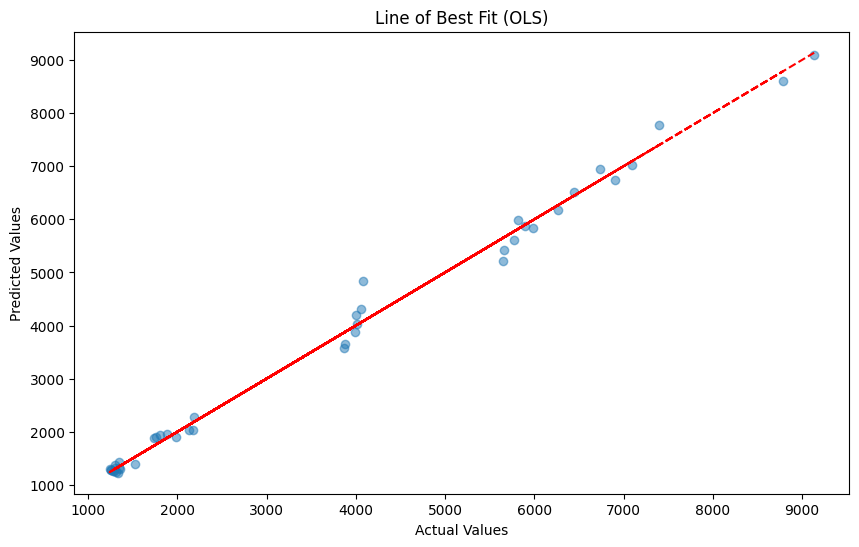

In [ ]:
# Plot the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Line of Best Fit (OLS)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

From the diagram, we can see that our model can do well to predict future data since there are linear relationship as seen.

## SkLearn Linear Regression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.2, random_state=42)

In [ ]:
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(X_train)
# x_test_scaled = scaler.transform(X_test)

In [ ]:
#Linear regression from sklearn

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
print("R^2 score on test set:", model.score(X_test, y_test))
#

# Predict using the test data
y_pred = model.predict(X_test)
# print("Mean Sqaured Error on test set", mean_squared_error(y_test, y_pred))

R^2 score on test set: 0.9674703490720546


R-squared: The coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, it's 0.967, indicating that 96.7% of the variance in the dependent variable is explained by the independent variables.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("Mean absolute percentage error:", mape)

Mean absolute error: 355.0045142837945
Root mean squared error: 465.89108957768616
Mean absolute percentage error: 0.07934937114143333


Mean Absolute Error (MAE): This measures the average absolute difference between the predicted values and the actual values. In this case, the MAE is approximately 355.00.

Root Mean Squared Error (RMSE): This is similar to MAE but gives more weight to large errors. It's the square root of the average of the squared differences between predicted and actual values. The RMSE is approximately 465.89.

Mean Absolute Percentage Error (MAPE): This measures the average absolute percentage difference between predicted and actual values, expressed as a percentage of the actual values. In our case, the MAPE is approximately 0.0793, or 7.93%.

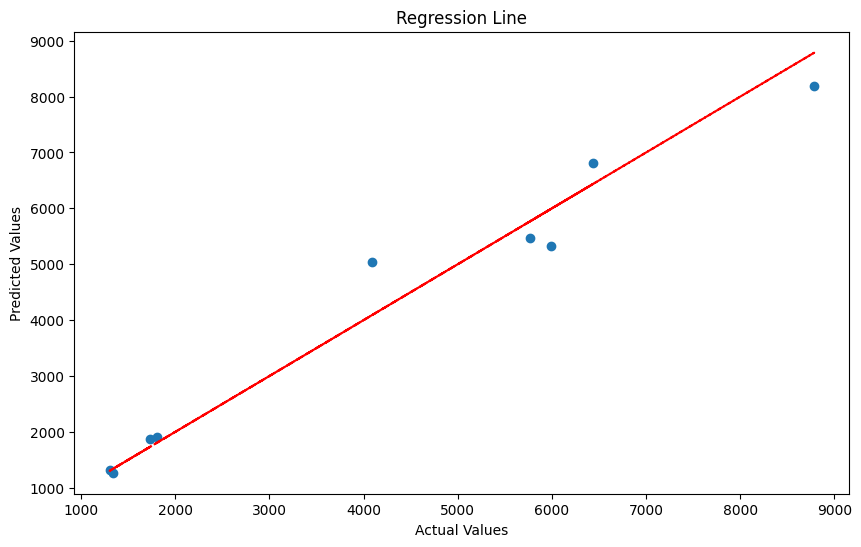

In [ ]:
# prompt: plot the regression line

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Also, we can see that the model can help us predict future data with good predictions

## AutoArima (Time Series Analysis)

In [ ]:
#reset index
combined_df = combined_df.reset_index()

We will create two Arima models, one for Asia and the other for Africa to have predictions for both Asia and Africa separately

In [ ]:
# Filter data for Asia and Africa
asia_data = combined_df[combined_df['region'] == 'Asia']
africa_data = combined_df[combined_df['region'] == 'Africa']

# Define the function to fit ARIMA model and make forecast
def fit_arima_and_forecast(data, steps):
    # Fit ARIMA model
    model = ARIMA(data['Renewable-electricity-generating-capacity-per-capita'], order=(1,1,1))
    model_fit = model.fit()

    # Print model summary
    print(model_fit.summary())

    # Make forecast
    forecast = model_fit.forecast(steps=steps)

    return forecast

### For Asia

In [ ]:
# Fit ARIMA and make forecast for Asia
asia_forecast = fit_arima_and_forecast(asia_data, steps=6)  # Forecasting for 6 years (up to 2025)

                                                SARIMAX Results                                                 
Dep. Variable:     Renewable-electricity-generating-capacity-per-capita   No. Observations:                   21
Model:                                                   ARIMA(1, 1, 1)   Log Likelihood                -150.177
Date:                                                  Fri, 22 Mar 2024   AIC                            306.355
Time:                                                          08:06:00   BIC                            309.342
Sample:                                                               0   HQIC                           306.938
                                                                   - 21                                         
Covariance Type:                                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

- The AR coefficient close to 1 suggests strong autocorrelation, indicating that past values of the series influence future values.
- The negative MA coefficient suggests that past forecast errors have a negative impact on the current forecast.
- The high variance (sigma2) indicates variability in the residuals.

### For Africa

In [ ]:
# Fit ARIMA and make forecast for Africa
africa_forecast = fit_arima_and_forecast(africa_data, steps=6)  # Forecasting for 6 years (up to 2025)

                                                SARIMAX Results                                                 
Dep. Variable:     Renewable-electricity-generating-capacity-per-capita   No. Observations:                   21
Model:                                                   ARIMA(1, 1, 1)   Log Likelihood                -107.195
Date:                                                  Fri, 22 Mar 2024   AIC                            220.390
Time:                                                          08:06:00   BIC                            223.377
Sample:                                                               0   HQIC                           220.973
                                                                   - 21                                         
Covariance Type:                                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------

- The AR coefficient close to 0 suggests weak autocorrelation, indicating that past values of the series have little influence on future values.
- The MA coefficient close to 1 suggests that past forecast errors influence the current forecast.
- The high variance (sigma2) indicates variability in the residuals.

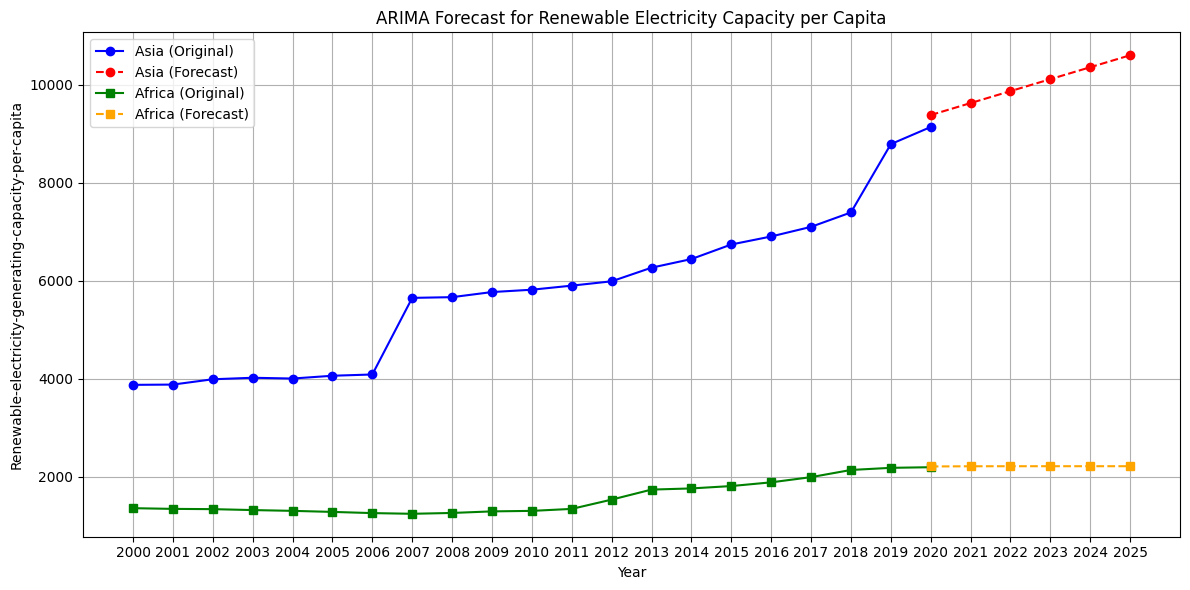

In [ ]:
import matplotlib.pyplot as plt

# Plot the forecasts
plt.figure(figsize=(12, 6))

# Plot for Asia
plt.plot(asia_data['Year'], asia_data['Renewable-electricity-generating-capacity-per-capita'], marker='o', linestyle='-', color='blue', label='Asia (Original)')
plt.plot(range(2020, 2026), asia_forecast, marker='o', linestyle='--', color='red', label='Asia (Forecast)')

# Plot for Africa
plt.plot(africa_data['Year'], africa_data['Renewable-electricity-generating-capacity-per-capita'], marker='s', linestyle='-', color='green', label='Africa (Original)')
plt.plot(range(2020, 2026), africa_forecast, marker='s', linestyle='--', color='orange', label='Africa (Forecast)')

plt.title('ARIMA Forecast for Renewable Electricity Capacity per Capita')
plt.xlabel('Year')
plt.ylabel('Renewable-electricity-generating-capacity-per-capita')
plt.xticks(range(2000, 2026, 1))  # Set x-ticks to 1 year step
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Create DataFrame for predictions
predictions_df = pd.DataFrame({
    'Year': range(2020, 2026),
    'Asia_Predictions': asia_forecast,
    'Africa_Predictions': africa_forecast
})

predictions_df

,Year,Asia_Predictions,Africa_Predictions
21,2020,9379.09,2208.17
22,2021,9623.19,2212.05
23,2022,9867.23,2213.05
24,2023,10111.20,2213.30
25,2024,10355.11,2213.36
26,2025,10598.94,2213.38


It is forecasted that the Renewable Electricity Generating Capacity per capita for Asia will get to 2213.38 for Africa and 10598.94 for Asia